# **Importing Data, Libraries and Inital Checks**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from plotnine import *
from collections import defaultdict
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Importing the data
main = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
backup = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [4]:
df = main
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3561 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


In [5]:
# Checking the shape of the dataset
df.shape

(5268, 14)



---



# **Data Cleaning and Pre-processing**

In [6]:
df.head(5)

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [7]:
df.columns

Index(['index', 'Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route',
       'Type', 'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground',
       'Summary'],
      dtype='object')

In [8]:
# Categorical Variables (qualitative / text-based or group identifiers)
cats = ['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type', 'Registration', 'cn/In', 'Summary']

# Quantitative Variables (numeric and measurable)
quants = ['Aboard', 'Fatalities', 'Ground']

In [9]:
# Summary statistics on 'Quantitative' variables
df_quants = df.loc[:,quants]
df_cats = df.loc[:,cats]

df_quants.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [10]:
# Summary statistics on 'Categorical' variables
df_cats.describe()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Summary
count,5268,3049,5248,5250,1069,3561,5241,4933,4040,4878
unique,4753,1005,4303,2476,724,3243,2446,4905,3707,4673
top,02/28/1973,15:00,"Moscow, Russia",Aeroflot,-,Training,Douglas DC-3,49,178,Crashed during takeoff.
freq,4,32,15,179,67,81,334,3,6,15


In [11]:
# Checking unique datapoints in 'Categorical' variables
for i in cats:
  print(df[i].value_counts())

Date
02/28/1973    4
06/18/1972    4
08/28/1976    4
08/31/1988    4
08/27/1992    4
             ..
05/20/2009    1
05/26/2009    1
06/01/2009    1
06/07/2009    1
02/25/2009    1
Name: count, Length: 4753, dtype: int64
Time
15:00    32
12:00    31
11:00    29
19:30    26
16:00    26
         ..
09:17     1
15:32     1
06:07     1
05:50     1
17:08     1
Name: count, Length: 1005, dtype: int64
Location
Moscow, Russia                                        15
Sao Paulo, Brazil                                     15
Rio de Janeiro, Brazil                                14
Anchorage, Alaska                                     13
Manila, Philippines                                   13
                                                      ..
Near Madiun, Indonesia                                 1
Near Isiro, DemocratiRepubliCongo                      1
AtlantiOcean, 570 miles northeast of Natal, Brazil     1
Near Port Hope Simpson, Newfoundland, Canada           1
Manacapuru, Brazil     

In [12]:
# Checking integers available in integer 'Quantitative' variables
for i in quants:
  print(i, df[i].unique())

Aboard [  2.   5.   1.  20.  30.  41.  19.  22.  28.  23.  21.  24.  18.  nan
   8.   3.  46.  45.   7.  17.   4.   6.  52.  43.  12.  11.  10.   9.
  14.  15.  13.  16.  54.  76.  50.  25.  97.  29.  33.  37.  35.  26.
  39.  27.  31.  59.  44.  38.  49.  32.  42.  53.  40.  48.  36.  69.
  81.  34.  58.  55.  83.  65.  51.  56.  63.  47.  70.  57. 115. 129.
  66.  74.  64. 128.  80.  62. 101. 159.  67.  68.  79.  61.  99.  73.
  60.  94.  72.  78. 106.  85. 122.  77.  95. 111. 107. 132. 112.  84.
 105.  86. 118.  87. 125. 153.  91. 117. 133. 124.  98.  82.  90. 130.
  88. 127. 155. 120.  89.  92. 102. 109. 100.  75. 229.  93. 126. 164.
 218. 121. 104. 156. 174. 176. 202. 113. 182. 145. 134. 119. 149. 108.
 177. 298. 346.  96. 157. 191. 330. 188. 131. 258. 154. 644. 165. 213.
 200. 137. 262. 189. 271. 178. 257. 135. 146. 166. 168. 291. 301. 226.
 110.   0. 167. 180. 212. 394. 172. 269. 192. 116. 179. 240.  71. 148.
 274. 329. 163. 524. 103. 256. 150. 384. 183. 143. 136. 290. 259. 144.

In [13]:
# Checking for 'Duplicates' of data set
df.duplicated().sum()

np.int64(0)

In [14]:
# Checking 'Null' values
df.isnull().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [15]:
# Replace 'NA' values with 'Unkown' in 'Type', 'Operator', and 'Summary'
df['Type'].fillna('Unknown', inplace=True)
df['Operator'].fillna('Unknown', inplace=True)
df['Summary'].fillna('Unknown', inplace=True)

C:\Users\DINITHI\AppData\Local\Temp\ipykernel_25636\4125002782.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


C:\Users\DINITHI\AppData\Local\Temp\ipykernel_25636\4125002782.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace



---



# **Part 1**: Feature Engineering I

In [16]:
# Convert 'Date' into datetime feature
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5268, dtype: datetime64[ns]

In [17]:
# Create a new categorical variable 'Year' extracted from 'Date'
df['Year'] = df['Date'].dt.year

In [18]:
# Create a new categorical variable 'Month' extracted from 'Date'
df['Month'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%b')

In [19]:
# Define water body categories
water_bodies = {
    'Ocean': [
        'pacific ocean', 'atlantic ocean', 'indian ocean', 'southern ocean', 'arctic ocean',
        'north pacific', 'south pacific', 'north atlantic', 'south atlantic', 'pacific', 'atlantic'
    ],
    'Sea': [
        'mediterranean sea', 'caribbean sea', 'north sea', 'baltic sea', 'red sea', 'black sea',
        'caspian sea', 'aegean sea', 'adriatic sea', 'tyrrhenian sea', 'ionian sea', 'ligurian sea',
        'sea of japan', 'east china sea', 'south china sea', 'yellow sea', 'sea of okhotsk',
        'beaufort sea', 'chukchi sea', 'laptev sea', 'east siberian sea', 'kara sea', 'white sea',
        'barents sea', 'norwegian sea', 'greenland sea', 'labrador sea', 'coral sea', 'tasman sea',
        'bering sea', 'arabian sea', 'bay of bengal'
    ],
    'Channel': [
        'english channel', 'bristol channel', 'st. george channel', 'irish sea', 'strait of gibraltar',
        'strait of hormuz', 'strait of malacca', 'bering strait', 'bass strait', 'cook strait',
        'torres strait', 'denmark strait', 'dover strait', 'strait of magellan', 'strait of juan de fuca'
    ],
    'River': [
        'amazon river', 'nile river', 'mississippi river', 'missouri river', 'colorado river',
        'columbia river', 'rio grande', 'st. lawrence river', 'mackenzie river', 'yukon river',
        'congo river', 'niger river', 'zambezi river', 'yangtze river', 'yellow river', 'mekong river',
        'ganges river', 'indus river', 'brahmaputra river', 'irrawaddy river', 'salween river',
        'volga river', 'dnieper river', 'don river', 'ob river', 'yenisei river', 'lena river',
        'amur river', 'rhine river', 'danube river', 'elbe river', 'oder river', 'vistula river',
        'seine river', 'loire river', 'rhone river', 'po river', 'tiber river', 'thames river'
    ],
    'Gulf': [
        'gulf of mexico', 'persian gulf', 'gulf of alaska', 'gulf of california', 'gulf of guinea',
        'gulf of aden', 'gulf of oman', 'gulf of thailand', 'gulf of carpentaria', 'gulf of st. lawrence',
        'hudson bay', 'james bay', 'great lakes', 'lake superior', 'lake michigan', 'lake huron',
        'lake erie', 'lake ontario'
    ]
}

# Combine all water body names for quick lookup
all_water_bodies = {}
for category, bodies in water_bodies.items():
    for body in bodies:
        all_water_bodies[body] = category

# Country to Continent mapping (comprehensive)
country_to_continent = {
    # North America
    'United States': 'North America', 'USA': 'North America', 'US': 'North America',
    'Canada': 'North America', 'Mexico': 'North America', 'Guatemala': 'North America',
    'Belize': 'North America', 'Honduras': 'North America', 'El Salvador': 'North America',
    'Nicaragua': 'North America', 'Costa Rica': 'North America', 'Panama': 'North America',
    'Cuba': 'North America', 'Jamaica': 'North America', 'Haiti': 'North America',
    'Dominican Republic': 'North America', 'Puerto Rico': 'North America',
    'Trinidad and Tobago': 'North America', 'Barbados': 'North America',
    'Bahamas': 'North America', 'Bermuda': 'North America', 'Greenland': 'North America',

    # South America
    'Brazil': 'South America', 'Argentina': 'South America', 'Chile': 'South America',
    'Peru': 'South America', 'Colombia': 'South America', 'Venezuela': 'South America',
    'Ecuador': 'South America', 'Bolivia': 'South America', 'Paraguay': 'South America',
    'Uruguay': 'South America', 'Guyana': 'South America', 'Suriname': 'South America',
    'French Guiana': 'South America',

    # Europe
    'United Kingdom': 'Europe', 'UK': 'Europe', 'England': 'Europe', 'Scotland': 'Europe',
    'Wales': 'Europe', 'Northern Ireland': 'Europe', 'Ireland': 'Europe',
    'France': 'Europe', 'Germany': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe',
    'Portugal': 'Europe', 'Netherlands': 'Europe', 'Belgium': 'Europe', 'Switzerland': 'Europe',
    'Austria': 'Europe', 'Poland': 'Europe', 'Czech Republic': 'Europe', 'Slovakia': 'Europe',
    'Hungary': 'Europe', 'Romania': 'Europe', 'Bulgaria': 'Europe', 'Bulgeria': 'Europe', 'Greece': 'Europe',
    'Yugoslavia': 'Europe', 'Croatia': 'Europe', 'Serbia': 'Europe', 'Bosnia': 'Europe',
    'Slovenia': 'Europe', 'Macedonia': 'Europe', 'Albania': 'Europe', 'Montenegro': 'Europe',
    'Norway': 'Europe', 'Sweden': 'Europe', 'Denmark': 'Europe', 'Finland': 'Europe',
    'Iceland': 'Europe', 'Russia': 'Europe', 'Soviet Union': 'Europe', 'USSR': 'Europe',
    'Ukraine': 'Europe', 'Belarus': 'Europe', 'Lithuania': 'Europe', 'Latvia': 'Europe',
    'Estonia': 'Europe', 'Moldova': 'Europe', 'Georgia': 'Europe', 'Armenia': 'Europe',
    'Azerbaijan': 'Europe', 'Turkey': 'Europe', 'Cyprus': 'Europe', 'Malta': 'Europe',
    'Luxembourg': 'Europe', 'Monaco': 'Europe', 'Liechtenstein': 'Europe',

    # Asia
    'China': 'Asia', 'Japan': 'Asia', 'India': 'Asia', 'Indonesia': 'Asia',
    'Pakistan': 'Asia', 'Bangladesh': 'Asia', 'Philippines': 'Asia', 'Vietnam': 'Asia',
    'Thailand': 'Asia', 'Myanmar': 'Asia', 'Malaysia': 'Asia', 'Nepal': 'Asia',
    'Sri Lanka': 'Asia', 'Afghanistan': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia',
    'Syria': 'Asia', 'Lebanon': 'Asia', 'Jordan': 'Asia', 'Israel': 'Asia',
    'Palestine': 'Asia', 'Saudi Arabia': 'Asia', 'Yemen': 'Asia', 'Oman': 'Asia',
    'United Arab Emirates': 'Asia', 'Qatar': 'Asia', 'Bahrain': 'Asia', 'Kuwait': 'Asia',
    'Kazakhstan': 'Asia', 'Uzbekistan': 'Asia', 'Turkmenistan': 'Asia', 'Kyrgyzstan': 'Asia',
    'Tajikistan': 'Asia', 'Mongolia': 'Asia', 'North Korea': 'Asia', 'South Korea': 'Asia',
    'Taiwan': 'Asia', 'Hong Kong': 'Asia', 'Macau': 'Asia', 'Singapore': 'Asia',
    'Brunei': 'Asia', 'Cambodia': 'Asia', 'Laos': 'Asia', 'Maldives': 'Asia',
    'Bhutan': 'Asia', 'Timor-Leste': 'Asia',

    # Africa
    'Egypt': 'Africa', 'Libya': 'Africa', 'Algeria': 'Africa', 'Morocco': 'Africa',
    'Tunisia': 'Africa', 'Sudan': 'Africa', 'South Sudan': 'Africa', 'Ethiopia': 'Africa',
    'Kenya': 'Africa', 'Tanzania': 'Africa', 'Uganda': 'Africa', 'Rwanda': 'Africa',
    'Burundi': 'Africa', 'Democratic Republic of Congo': 'Africa', 'Congo': 'Africa',
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Niger': 'Africa',
    'Nigeria': 'Africa', 'Mali': 'Africa', 'Burkina Faso': 'Africa', 'Ghana': 'Africa',
    'Ivory Coast': 'Africa', 'Liberia': 'Africa', 'Sierra Leone': 'Africa', 'Guinea': 'Africa',
    'Senegal': 'Africa', 'Mauritania': 'Africa', 'Gambia': 'Africa', 'Guinea-Bissau': 'Africa',
    'Cape Verde': 'Africa', 'South Africa': 'Africa', 'Namibia': 'Africa', 'Botswana': 'Africa',
    'Zimbabwe': 'Africa', 'Zambia': 'Africa', 'Malawi': 'Africa', 'Mozambique': 'Africa',
    'Madagascar': 'Africa', 'Mauritius': 'Africa', 'Seychelles': 'Africa', 'Comoros': 'Africa',
    'Djibouti': 'Africa', 'Eritrea': 'Africa', 'Somalia': 'Africa', 'Angola': 'Africa',
    'Cameroon': 'Africa', 'Equatorial Guinea': 'Africa', 'Gabon': 'Africa', 'Sao Tome and Principe': 'Africa',
    'Togo': 'Africa', 'Benin': 'Africa', 'Lesotho': 'Africa', 'Eswatini': 'Africa',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania', 'Papua New Guinea': 'Oceania',
    'Fiji': 'Oceania', 'Solomon Islands': 'Oceania', 'Vanuatu': 'Oceania',
    'Samoa': 'Oceania', 'Tonga': 'Oceania', 'Kiribati': 'Oceania', 'Tuvalu': 'Oceania',
    'Nauru': 'Oceania', 'Palau': 'Oceania', 'Marshall Islands': 'Oceania',
    'Micronesia': 'Oceania', 'Cook Islands': 'Oceania', 'Niue': 'Oceania',
    'American Samoa': 'Oceania', 'Guam': 'Oceania', 'Northern Mariana Islands': 'Oceania',
    'French Polynesia': 'Oceania', 'New Caledonia': 'Oceania', 'Wallis and Futuna': 'Oceania',

    # Antarctica
    'Antarctica': 'Antarctica'
}

# State/Province mappings
us_states = {
    'Alabama': 'United States', 'Alaska': 'United States', 'Arizona': 'United States', 'Arkansas': 'United States',
    'California': 'United States', 'Colorado': 'United States', 'Connecticut': 'United States', 'Delaware': 'United States',
    'Florida': 'United States', 'Georgia': 'United States', 'Hawaii': 'United States', 'Idaho': 'United States',
    'Illinois': 'United States', 'Indiana': 'United States', 'Iowa': 'United States', 'Kansas': 'United States',
    'Kentucky': 'United States', 'Louisiana': 'United States', 'Maine': 'United States', 'Maryland': 'United States',
    'Massachusetts': 'United States', 'Michigan': 'United States', 'Minnesota': 'United States', 'Mississippi': 'United States',
    'Missouri': 'United States', 'Montana': 'United States', 'Nebraska': 'United States', 'Nevada': 'United States',
    'New Hampshire': 'United States', 'New Jersey': 'United States', 'New Mexico': 'United States', 'New York': 'United States',
    'North Carolina': 'United States', 'North Dakota': 'United States', 'Ohio': 'United States', 'Oklahoma': 'United States',
    'Oregon': 'United States', 'Pennsylvania': 'United States', 'Rhode Island': 'United States', 'South Carolina': 'United States',
    'South Dakota': 'United States', 'Tennessee': 'United States', 'Texas': 'United States', 'Utah': 'United States',
    'Vermont': 'United States', 'Virginia': 'United States', 'Washington': 'United States', 'West Virginia': 'United States',
    'Wisconsin': 'United States', 'Wyoming': 'United States'
}

canadian_provinces = {
    'Alberta': 'Canada', 'British Columbia': 'Canada', 'Manitoba': 'Canada', 'New Brunswick': 'Canada',
    'Newfoundland and Labrador': 'Canada', 'Northwest Territories': 'Canada', 'Nova Scotia': 'Canada',
    'Nunavut': 'Canada', 'Ontario': 'Canada', 'Prince Edward Island': 'Canada', 'Quebec': 'Canada',
    'Saskatchewan': 'Canada', 'Yukon': 'Canada'
}

# Water body to continent mapping for seas/rivers/channels
water_to_continent = {
    'Mediterranean Sea': 'Europe', 'North Sea': 'Europe', 'Baltic Sea': 'Europe', 'Black Sea': 'Europe',
    'Caspian Sea': 'Asia', 'Red Sea': 'Africa', 'Arabian Sea': 'Asia', 'Bay of Bengal': 'Asia',
    'Sea of Japan': 'Asia', 'East China Sea': 'Asia', 'South China Sea': 'Asia', 'Yellow Sea': 'Asia',
    'Caribbean Sea': 'North America', 'Gulf of Mexico': 'North America', 'Hudson Bay': 'North America',
    'Great Lakes': 'North America', 'English Channel': 'Europe', 'Irish Sea': 'Europe',
    'Coral Sea': 'Oceania', 'Tasman Sea': 'Oceania'
}

def analyze_location(location):
    """
    Analyze location and return detailed geographical information
    Returns: dict with all required information
    """
    if pd.isna(location):
        return create_unknown_result()

    location = str(location).strip()
    location_lower = location.lower()

    # Check if it's a water body
    water_info = check_water_body(location_lower)
    if water_info['is_water']:
        return water_info

    # If not water, process as land location
    return process_land_location(location)

def check_water_body(location_lower):
    """Check if location is a water body and categorize it"""

    # Check for specific water bodies
    for water_name, category in all_water_bodies.items():
        if water_name in location_lower:
            result = {
                'location_type': 'Watery',
                'is_water': True,
                'water_body_type': category,
                'water_body_name': water_name.title(),
                'continent': 'Unknown',
                'country': 'Unknown',
                'state_province': 'Unknown'
            }

            # For non-ocean water bodies, try to determine continent/country
            if category != 'Ocean':
                continent, country, state = get_water_body_location(water_name, location_lower)
                result['continent'] = continent
                result['country'] = country
                result['state_province'] = state

            return result

    # Check for general water indicators
    water_indicators = ['ocean', 'sea', 'gulf', 'bay', 'strait', 'channel', 'sound', 'river', 'lake']
    for indicator in water_indicators:
        if indicator in location_lower:
            # Try to extract water body name and type
            water_type = categorize_water_type(indicator)
            water_name = extract_water_name(location_lower, indicator)

            result = {
                'location_type': 'Watery',
                'is_water': True,
                'water_body_type': water_type,
                'water_body_name': water_name,
                'continent': 'Unknown',
                'country': 'Unknown',
                'state_province': 'Unknown'
            }

            if water_type != 'Ocean':
                continent, country, state = infer_water_location_from_context(location_lower)
                result['continent'] = continent
                result['country'] = country
                result['state_province'] = state

            return result

    return {'is_water': False}

def categorize_water_type(indicator):
    """Categorize water body type based on indicator"""
    if indicator in ['ocean']:
        return 'Ocean'
    elif indicator in ['sea']:
        return 'Sea'
    elif indicator in ['channel', 'strait']:
        return 'Channel'
    elif indicator in ['river']:
        return 'River'
    elif indicator in ['gulf', 'bay', 'sound', 'lake']:
        return 'Gulf'
    return 'Unknown'

def extract_water_name(location_lower, indicator):
    """Extract water body name from location"""
    words = location_lower.split()
    for i, word in enumerate(words):
        if indicator in word:
            # Try to get the name before the indicator
            if i > 0:
                return ' '.join(words[max(0, i-1):i+1]).title()
            else:
                return word.title()
    return 'Unknown'

def get_water_body_location(water_name, location_lower):
    """Get continent/country/state for known water bodies"""
    # Check predefined mappings
    water_name_title = water_name.title()
    if water_name_title in water_to_continent:
        continent = water_to_continent[water_name_title]
        return continent, 'Unknown', 'Unknown'

    # Try to infer from context
    return infer_water_location_from_context(location_lower)

def infer_water_location_from_context(location_lower):
    """Infer water body location from surrounding context"""
    # Look for country/state names in the location string
    for country, continent in country_to_continent.items():
        if country.lower() in location_lower:
            return continent, country, 'Unknown'

    for state, country in us_states.items():
        if state.lower() in location_lower:
            return 'North America', country, state

    for province, country in canadian_provinces.items():
        if province.lower() in location_lower:
            return 'North America', country, province

    return 'Unknown', 'Unknown', 'Unknown'

def process_land_location(location):
    """Process land-based location"""
    parts = [part.strip() for part in location.split(',')]

    # Clean up common prefixes
    parts = [re.sub(r'^(near|off|over)\s+', '', part, flags=re.IGNORECASE) for part in parts]

    continent = 'Unknown'
    country = 'Unknown'
    state_province = 'Unknown'

    if len(parts) > 3:
        # Format: Street, City, State/Province, Country
        state_province = parts[1]
        country = standardize_country_name(parts[3])
        continent = get_continent_from_country(country)
    elif len(parts) == 3:
        # Format: City, State/Province, Country
        state_province = parts[1]
        country = standardize_country_name(parts[2])
        continent = get_continent_from_country(country)
    elif len(parts) == 2:
        # Format: City, Country OR State, Country
        potential_country = standardize_country_name(parts[1])
        if potential_country in country_to_continent:
            country = potential_country
            continent = country_to_continent[country]
        else:
            # Might be state/province
            state_province = parts[1]
            country = get_country_from_state(state_province)
            continent = get_continent_from_country(country)
    elif len(parts) == 1:
        # Single location
        single_loc = parts[0]
        country = get_country_from_state(single_loc)
        if country != 'Unknown':
            state_province = single_loc
            continent = get_continent_from_country(country)
        else:
            # Try as country
            country = standardize_country_name(single_loc)
            continent = get_continent_from_country(country)

    return {
        'location_type': 'Land',
        'is_water': False,
        'water_body_type': 'Unknown',
        'water_body_name': 'Unknown',
        'continent': continent,
        'country': country,
        'state_province': state_province
    }

def standardize_country_name(country):
    """Standardize country names"""
    country = country.strip()
    country_lower = country.lower()

    if country_lower in ['united states', 'usa', 'us']:
        return 'United States'
    elif country_lower in ['united kingdom', 'uk', 'britain']:
        return 'United Kingdom'
    elif country_lower in ['soviet union', 'ussr']:
        return 'Soviet Union'

    # Check if it matches any known country
    for known_country in country_to_continent.keys():
        if known_country.lower() == country_lower:
            return known_country

    return country.title()

def get_country_from_state(state_province):
    """Get country from state/province name"""
    state_province = state_province.strip().title()

    if state_province in us_states:
        return us_states[state_province]
    elif state_province in canadian_provinces:
        return canadian_provinces[state_province]

    return 'Unknown'

def get_continent_from_country(country):
    """Get continent from country name"""
    if country in country_to_continent:
        return country_to_continent[country]
    return 'Unknown'

def create_unknown_result():
    """Create result for unknown locations"""
    return {
        'location_type': 'Unknown',
        'is_water': False,
        'water_body_type': 'Unknown',
        'water_body_name': 'Unknown',
        'continent': 'Unknown',
        'country': 'Unknown',
        'state_province': 'Unknown'
    }

# Apply the analysis to all locations
print("Analyzing location data...")
location_analysis = df['Location'].apply(analyze_location)

# Extract results into separate columns
df['LocationType'] = [result['location_type'] for result in location_analysis]
df['WaterBodyType'] = [result['water_body_type'] for result in location_analysis]
df['WaterBodyName'] = [result['water_body_name'] for result in location_analysis]
df['Continent'] = [result['continent'] for result in location_analysis]
df['Country'] = [result['country'] for result in location_analysis]
df['FederalSubject'] = [result['state_province'] for result in location_analysis]

Analyzing location data...


| Time Duration | DayPeriod |
| ------------- |---------- |
| 05:00 – 11:59 | Morning   |
| 12:00 – 16:59 | Afternoon |
| 17:00 – 20:59 | Evening   |
| 21:00 – 04:59 | Night     |


In [20]:
# Create 'DayPeriod' from 'Time'

def get_day_period(time_str):
    try:
        time_str = str(time_str).strip().lower().replace('.', '')
        if time_str in ['nan', '', 'unknown']:
            return 'Unknown'

        # Standardize time (e.g., 5:05 becomes 05:05)
        if len(time_str.split(':')[0]) == 1:
            time_str = '0' + time_str

        # Parse to hour
        hour = int(time_str.split(':')[0])

        if 5 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 17:
            return 'Afternoon'
        elif 17 <= hour < 21:
            return 'Evening'
        else:
            return 'Night'
    except:
        return 'Unknown'

df['DayPeriod'] = df['Time'].apply(get_day_period)

# **Part 2**: Changing Data Type

In [21]:
# Convert 'Aboard', 'Fatalities', 'Ground' into numeric
cols_to_convert = ['Aboard', 'Fatalities', 'Ground']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

# **Part 3**: Dropping Irrelevant Columns

| Column         | Reason to Drop                         |
| -------------- | ------------------------------------------------------------|
| **index**      | Just a row number (auto-generated by pandas) — no analytical value|
| **Flight #**   | Mostly unique identifiers; no analytical patterns; not used in survival study    |
| **cn/In**        | Aircraft serial/construction number — unlikely to generalize or be interpretable |
| **Registration** | Aircraft registration number — highly unique and not helpful for trends          |
| **Route**        | Too unstructured for effective grouping; often missing or inconsistent           |
| **Date**         | Redundant after **Year** extraction |
| **Time**         | High missingness; already binned into **DayPeriod** |
| **Location**     | Messy and inconsistent; **Country/Continent** gives clean versions |

In [22]:
df.drop(columns=[
    'index',
    'Flight #',
    'Route',
    'Registration',
    'cn/In',
    'Date',
    'Time',
    'Location'
], inplace=True)


In [23]:
df = df[['Year', 'Month', 'DayPeriod', 'Type', 'Operator', 'LocationType', 'Continent', 'Country',
         'WaterBodyType', 'WaterBodyName', 'FederalSubject', 'Aboard', 'Fatalities', 'Ground', 'Summary']]
df

,Year,Month,DayPeriod,Type,Operator,LocationType,Continent,Country,WaterBodyType,WaterBodyName,FederalSubject,Aboard,Fatalities,Ground,Summary
0,1908,Sep,Evening,Wright Flyer III,Military - U.S. Army,Land,North America,United States,Unknown,Unknown,Virginia,2,1,0,"During a demonstration flight, a U.S. Army fly..."
1,1912,Jul,Morning,Dirigible,Military - U.S. Navy,Watery,Unknown,Unknown,Ocean,Atlantic,Unknown,5,5,0,First U.S. dirigible Akron exploded just offsh...
2,1913,Aug,Unknown,Curtiss seaplane,Private,Land,North America,Canada,Unknown,Unknown,British Columbia,1,1,0,The first fatal airplane accident in Canada oc...
3,1913,Sep,Evening,Zeppelin L-1 (airship),Military - German Navy,Watery,Europe,Unknown,Sea,North Sea,Unknown,20,14,0,The airship flew into a thunderstorm and encou...
4,1913,Oct,Morning,Zeppelin L-2 (airship),Military - German Navy,Land,Europe,Germany,Unknown,Unknown,Unknown,30,30,0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2009,May,Morning,Lockheed C-130 Hercules,Military - Indonesian Air Force,Land,Asia,Indonesia,Unknown,Unknown,Unknown,112,98,2,"While on approach, the military transport cras..."
5264,2009,May,Unknown,Antonov An-26,Service Air,Land,Unknown,Unknown,Unknown,Unknown,DemocratiRepubliCongo,4,4,<NA>,The cargo plane crashed while on approach to I...
5265,2009,Jun,Night,Airbus A330-203,Air France,Watery,Unknown,Unknown,Ocean,"Atlantiocean,",Unknown,228,228,0,The Airbus went missing over the AtlantiOcean ...
5266,2009,Jun,Morning,Britten-Norman BN-2A-27 Islander,Strait Air,Land,North America,Canada,Unknown,Unknown,Newfoundland,1,1,0,The air ambulance crashed into hills while att...


In [24]:
# Exclude rows with missing values
df = df.dropna(subset=['Aboard', 'Fatalities', 'Ground'])

In [25]:
# Checking the shape of the updated dataset
df.shape

(5236, 15)

# **Part 4**: Text Mining

Extract Summary-Based Features

In [26]:
# Categorizes the primary cause of the accident (Mechanical, Human Error, Weather, External, Unknown)
def extract_cause_category(summary):
    summary_lower = summary.lower()
    if 'engine failure' in summary_lower or 'mechanical failure' in summary_lower:
        return 'Mechanical'
    elif 'pilot error' in summary_lower or 'crew error' in summary_lower:
        return 'Human Error'
    elif 'weather' in summary_lower or 'fog' in summary_lower or 'rain' in summary_lower or 'snow' in summary_lower or 'thunderstorm' in summary_lower:
        return 'Weather'
    elif 'shot down' in summary_lower or 'collision' in summary_lower:
        return 'External'
    else:
        return 'Unknown'

# Identifies the weather condition during the accident (Fog, Rain, Snow, Thunderstorm, Clear, Unknown)
def extract_weather_condition(summary):
    summary_lower = summary.lower()
    if 'fog' in summary_lower:
        return 'Fog'
    elif 'rain' in summary_lower:
        return 'Rain'
    elif 'snow' in summary_lower:
        return 'Snow'
    elif 'thunderstorm' in summary_lower:
        return 'Thunderstorm'
    elif 'clear' in summary_lower:
        return 'Clear'
    else:
        return 'Unknown'

# Describes the type of location where the crash occurred (Ground, Mountain, Water, Urban, Unknown)
# def extract_crash_location_type(summary):
#     summary_lower = summary.lower()
#     if 'ground' in summary_lower or 'terrain' in summary_lower:
#         return 'Ground'
#     elif 'mountain' in summary_lower or 'hill' in summary_lower:
#         return 'Mountain'
#     elif 'sea' in summary_lower or 'ocean' in summary_lower or 'water' in summary_lower:
#         return 'Water'
#     elif 'urban' in summary_lower or 'city' in summary_lower or 'residential' in summary_lower:
#         return 'Urban'
#     else:
#         return 'Unknown'

# Indicates if there were survivors (Yes/No)
def extract_survivors(summary):
    summary_lower = summary.lower()
    if 'survivor' in summary_lower or 'rescued' in summary_lower:
        return 'Yes'
    elif summary_lower == 'unkown':
        return 'Unknown'
    else:
        return 'No'

# Identifies the phase of flight (Takeoff, Landing, En Route, Unknown)
def extract_flight_phase(summary):
    summary_lower = summary.lower()
    if 'takeoff' in summary_lower:
        return 'Takeoff'
    elif 'landing' in summary_lower or 'approach' in summary_lower:
        return 'Landing'
    elif 'en route' in summary_lower or 'cruise' in summary_lower:
        return 'En Route'
    else:
        return 'Unknown'

# Apply all extraction functions
df['CauseCategory'] = df['Summary'].apply(extract_cause_category)
df['WeatherCondition'] = df['Summary'].apply(extract_weather_condition)
#df['CrashLocationType'] = df['Summary'].apply(extract_crash_location_type)
df['Survivors'] = df['Summary'].apply(extract_survivors)
df['FlightPhase'] = df['Summary'].apply(extract_flight_phase)

C:\Users\DINITHI\AppData\Local\Temp\ipykernel_25636\2210311333.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\DINITHI\AppData\Local\Temp\ipykernel_25636\2210311333.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\DINITHI\AppData\Local\Temp\ipykernel_25636\2210311333.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [27]:
# Dropping 'Summary' column
df.drop(columns=['Summary'], inplace=True)

df

C:\Users\DINITHI\AppData\Local\Temp\ipykernel_25636\2548734641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Year,Month,DayPeriod,Type,Operator,LocationType,Continent,Country,WaterBodyType,WaterBodyName,FederalSubject,Aboard,Fatalities,Ground,CauseCategory,WeatherCondition,Survivors,FlightPhase
0,1908,Sep,Evening,Wright Flyer III,Military - U.S. Army,Land,North America,United States,Unknown,Unknown,Virginia,2,1,0,Unknown,Unknown,No,Unknown
1,1912,Jul,Morning,Dirigible,Military - U.S. Navy,Watery,Unknown,Unknown,Ocean,Atlantic,Unknown,5,5,0,Unknown,Unknown,No,Unknown
2,1913,Aug,Unknown,Curtiss seaplane,Private,Land,North America,Canada,Unknown,Unknown,British Columbia,1,1,0,Unknown,Unknown,No,Unknown
3,1913,Sep,Evening,Zeppelin L-1 (airship),Military - German Navy,Watery,Europe,Unknown,Sea,North Sea,Unknown,20,14,0,Weather,Thunderstorm,No,Unknown
4,1913,Oct,Morning,Zeppelin L-2 (airship),Military - German Navy,Land,Europe,Germany,Unknown,Unknown,Unknown,30,30,0,Unknown,Unknown,No,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,2009,May,Afternoon,Mi-35,Military - Venezuelan Army,Land,South America,Venezuela,Unknown,Unknown,Unknown,18,18,0,Unknown,Unknown,No,Unknown
5263,2009,May,Morning,Lockheed C-130 Hercules,Military - Indonesian Air Force,Land,Asia,Indonesia,Unknown,Unknown,Unknown,112,98,2,Unknown,Unknown,No,Landing
5265,2009,Jun,Night,Airbus A330-203,Air France,Watery,Unknown,Unknown,Ocean,"Atlantiocean,",Unknown,228,228,0,Weather,Thunderstorm,No,Unknown
5266,2009,Jun,Morning,Britten-Norman BN-2A-27 Islander,Strait Air,Land,North America,Canada,Unknown,Unknown,Newfoundland,1,1,0,Weather,Fog,No,Unknown


# **Part 5**: Create a New Categorical Response

| Rule                                | SurvivalSeverity |
| ----------------------------------- | ------------------ |
| Fatalities = 0                   | All Survived     |
| Fatalities = Aboard              | None Survived    |
| 0 < Fatalities < Aboard           | Partial Survived |
| Missing values in Aboard/Fatalities | Unknown         |


In [28]:
def label_survival_severity(row):
    if pd.isna(row['Aboard']) or pd.isna(row['Fatalities']):
        return 'Unknown'
    if row['Fatalities'] == 0:
        return 'All Survived'
    elif row['Fatalities'] == row['Aboard']:
        return 'None Survived'
    else:
        return 'Partial Survived'

df['SurvivalSeverity'] = df.apply(label_survival_severity, axis=1)

df = df[['Year', 'Month', 'DayPeriod', 'Type', 'Operator', 'LocationType', 'Continent', 'Country', 'WaterBodyType', 'WaterBodyName',
         'FederalSubject', 'CauseCategory', 'WeatherCondition', 'Survivors', 'FlightPhase', 'Aboard', 'Ground', 'Fatalities', 'SurvivalSeverity']]
df

C:\Users\DINITHI\AppData\Local\Temp\ipykernel_25636\4197537161.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Year,Month,DayPeriod,Type,Operator,LocationType,Continent,Country,WaterBodyType,WaterBodyName,FederalSubject,CauseCategory,WeatherCondition,Survivors,FlightPhase,Aboard,Ground,Fatalities,SurvivalSeverity
0,1908,Sep,Evening,Wright Flyer III,Military - U.S. Army,Land,North America,United States,Unknown,Unknown,Virginia,Unknown,Unknown,No,Unknown,2,0,1,Partial Survived
1,1912,Jul,Morning,Dirigible,Military - U.S. Navy,Watery,Unknown,Unknown,Ocean,Atlantic,Unknown,Unknown,Unknown,No,Unknown,5,0,5,None Survived
2,1913,Aug,Unknown,Curtiss seaplane,Private,Land,North America,Canada,Unknown,Unknown,British Columbia,Unknown,Unknown,No,Unknown,1,0,1,None Survived
3,1913,Sep,Evening,Zeppelin L-1 (airship),Military - German Navy,Watery,Europe,Unknown,Sea,North Sea,Unknown,Weather,Thunderstorm,No,Unknown,20,0,14,Partial Survived
4,1913,Oct,Morning,Zeppelin L-2 (airship),Military - German Navy,Land,Europe,Germany,Unknown,Unknown,Unknown,Unknown,Unknown,No,Unknown,30,0,30,None Survived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,2009,May,Afternoon,Mi-35,Military - Venezuelan Army,Land,South America,Venezuela,Unknown,Unknown,Unknown,Unknown,Unknown,No,Unknown,18,0,18,None Survived
5263,2009,May,Morning,Lockheed C-130 Hercules,Military - Indonesian Air Force,Land,Asia,Indonesia,Unknown,Unknown,Unknown,Unknown,Unknown,No,Landing,112,2,98,Partial Survived
5265,2009,Jun,Night,Airbus A330-203,Air France,Watery,Unknown,Unknown,Ocean,"Atlantiocean,",Unknown,Weather,Thunderstorm,No,Unknown,228,0,228,None Survived
5266,2009,Jun,Morning,Britten-Norman BN-2A-27 Islander,Strait Air,Land,North America,Canada,Unknown,Unknown,Newfoundland,Weather,Fog,No,Unknown,1,0,1,None Survived


# **Part 6**: Multivariate Outlier Analysis

In [29]:
# Select features for outlier detection
features = ['Aboard', 'Fatalities', 'Ground']
df_outlier = df[features].dropna()

# Scale the data
scaler = StandardScaler()
scaled = scaler.fit_transform(df_outlier)

# Fit Isolation Forest
iso_forest = IsolationForest(contamination='auto', random_state=42)
df_outlier['Outlier'] = iso_forest.fit_predict(scaled)

# Map results to labels
df_outlier['Outlier'] = df_outlier['Outlier'].map({1: 'Inlier', -1: 'Outlier'})

# Merge back with original dataframe (optional)
df['Outlier'] = np.nan
df.loc[df_outlier.index, 'Outlier'] = df_outlier['Outlier']

df
# View summary
#print(df['Outlier'].value_counts(dropna=False))

C:\Users\DINITHI\AppData\Local\Temp\ipykernel_25636\1876035107.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\DINITHI\AppData\Local\Temp\ipykernel_25636\1876035107.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Inlier' 'Inlier' 'Inlier' ... 'Outlier' 'Inlier' 'Inlier']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


,Year,Month,DayPeriod,Type,Operator,LocationType,Continent,Country,WaterBodyType,WaterBodyName,FederalSubject,CauseCategory,WeatherCondition,Survivors,FlightPhase,Aboard,Ground,Fatalities,SurvivalSeverity,Outlier
0,1908,Sep,Evening,Wright Flyer III,Military - U.S. Army,Land,North America,United States,Unknown,Unknown,Virginia,Unknown,Unknown,No,Unknown,2,0,1,Partial Survived,Inlier
1,1912,Jul,Morning,Dirigible,Military - U.S. Navy,Watery,Unknown,Unknown,Ocean,Atlantic,Unknown,Unknown,Unknown,No,Unknown,5,0,5,None Survived,Inlier
2,1913,Aug,Unknown,Curtiss seaplane,Private,Land,North America,Canada,Unknown,Unknown,British Columbia,Unknown,Unknown,No,Unknown,1,0,1,None Survived,Inlier
3,1913,Sep,Evening,Zeppelin L-1 (airship),Military - German Navy,Watery,Europe,Unknown,Sea,North Sea,Unknown,Weather,Thunderstorm,No,Unknown,20,0,14,Partial Survived,Inlier
4,1913,Oct,Morning,Zeppelin L-2 (airship),Military - German Navy,Land,Europe,Germany,Unknown,Unknown,Unknown,Unknown,Unknown,No,Unknown,30,0,30,None Survived,Inlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,2009,May,Afternoon,Mi-35,Military - Venezuelan Army,Land,South America,Venezuela,Unknown,Unknown,Unknown,Unknown,Unknown,No,Unknown,18,0,18,None Survived,Inlier
5263,2009,May,Morning,Lockheed C-130 Hercules,Military - Indonesian Air Force,Land,Asia,Indonesia,Unknown,Unknown,Unknown,Unknown,Unknown,No,Landing,112,2,98,Partial Survived,Outlier
5265,2009,Jun,Night,Airbus A330-203,Air France,Watery,Unknown,Unknown,Ocean,"Atlantiocean,",Unknown,Weather,Thunderstorm,No,Unknown,228,0,228,None Survived,Outlier
5266,2009,Jun,Morning,Britten-Norman BN-2A-27 Islander,Strait Air,Land,North America,Canada,Unknown,Unknown,Newfoundland,Weather,Fog,No,Unknown,1,0,1,None Survived,Inlier


In [30]:
# Count total rows used in outlier detection (i.e., complete cases)
n_used = df['Outlier'].notna().sum()

# Count how many are labeled as 'Outlier'
n_outliers = (df['Outlier'] == 'Outlier').sum()

# Compute percentage
outlier_percent = (n_outliers / n_used) * 100
print(f"Outlier Percentage: {outlier_percent:.2f}%")

# Extract only rows marked as 'Outlier'
outlier_df = df[df['Outlier'] == 'Outlier'].copy()

#outlier_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/Airplane_Crashes_and_Fatalities_Since_1908_Outliers.csv", index=False)

Outlier Percentage: 11.46%


In [31]:
df.drop(columns=['Outlier'], inplace=True)

#df.to_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/Airplane_Crashes_and_Fatalities_Since_1908_Cleaned.csv", index=False)

In [32]:
# Categorical Variables (qualitative / text-based or group identifiers) in cleanened dataset
cats = ['Year', 'Month', 'DayPeriod', 'Type', 'Operator', 'LocationType', 'Continent', 'Country', 'WaterBodyType', 'WaterBodyName',
        'FederalSubject', 'CauseCategory', 'WeatherCondition', 'Survivors', 'FlightPhase', 'SurvivalSeverity']

# Quantitative Variables (numeric and measurable) in cleanened dataset
quants = ['Aboard', 'Ground', 'Fatalities']

In [33]:
# Checking unique datapoints in 'Categorical' variables
for i in cats:
  print(df[i].value_counts())

Year
1972    104
1968     96
1989     94
1967     91
1973     89
       ... 
1918      4
1913      3
1915      2
1908      1
1912      1
Name: count, Length: 98, dtype: int64
Month
Dec    513
Jan    494
Aug    472
Sep    457
Oct    452
Mar    450
Nov    449
Jul    427
Feb    393
Jun    384
Apr    377
May    368
Name: count, dtype: int64
DayPeriod
Unknown      2199
Morning       938
Afternoon     815
Night         648
Evening       636
Name: count, dtype: int64
Type
Douglas DC-3                                332
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 61
Douglas DC-4                                 40
                                           ... 
Zeppelin L-43 (airship)                       1
Zeppelin L-23 (airship)                       1
Zeppelin L-44 (airship)                       1
Zeppelin L-59 (airship)                       1
Airbus A320-232                               1
Na

* Check **Feature Correlation**

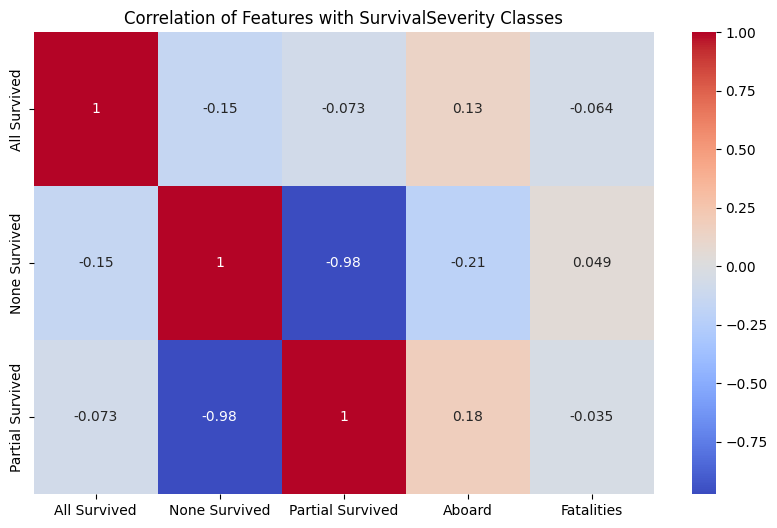

In [34]:
# One-hot encode target
df_encoded = pd.get_dummies(df['SurvivalSeverity'])

# Check correlation between input features and target
combined = pd.concat([df_encoded, df[['Aboard', 'Fatalities']]], axis=1)
corr = combined.corr()

# Visualize
plt.figure(figsize=(10, 6))
sns.heatmap(corr.loc[df_encoded.columns, :], cmap='coolwarm', annot=True)
plt.title("Correlation of Features with SurvivalSeverity Classes")
plt.show()

# **Part 7**: Train-Test Splitting

In [35]:
# Perform train-test split: 70% train, 30% test
train_df, test_df = train_test_split(df, stratify=df['SurvivalSeverity'], test_size=0.3, random_state=42)

# Save to CSV files
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)

train_df

,Year,Month,DayPeriod,Type,Operator,LocationType,Continent,Country,WaterBodyType,WaterBodyName,FederalSubject,CauseCategory,WeatherCondition,Survivors,FlightPhase,Aboard,Ground,Fatalities,SurvivalSeverity
4737,2000,Aug,Morning,Piper Navajo PA-31/ Piper Seminole PA-44,Patuxent Airways / Private,Land,North America,United States,Unknown,Unknown,New Jersey,Unknown,Unknown,No,Unknown,11,0,11,None Survived
3719,1987,Nov,Evening,de Havilland Canada DHC-4A Caribou,Kenn Borek Air,Watery,North America,Canada,River,"Ross River,",Unknown,Weather,Rain,No,Unknown,4,0,2,Partial Survived
3596,1985,Dec,Morning,McDonnell Douglas DC-8 Super 63PF,Arrow Airways,Land,North America,Canada,Unknown,Unknown,Newfoundland,Unknown,Unknown,No,Takeoff,256,0,256,None Survived
2062,1966,Aug,Unknown,Ilyushin IL-14,Tarom,Land,Europe,Romania,Unknown,Unknown,Unknown,Unknown,Unknown,No,En Route,24,0,24,None Survived
1534,1958,Apr,Evening,de Havilland DH-114 Heron 2D,Aviaco,Land,Europe,Spain,Unknown,Unknown,Unknown,Unknown,Unknown,No,Takeoff,16,0,16,None Survived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1952,May,Morning,Handley Page HP-81 Hermes IV,British Overseas Airways,Land,Africa,Mauritania,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,Landing,18,0,1,Partial Survived
4622,1999,Feb,Afternoon,Tupolev TU-154,China Southwest Airlines,Land,Asia,China,Unknown,Unknown,Unknown,Unknown,Unknown,No,Landing,61,0,61,None Survived
3637,1986,Aug,Morning,Howard 250,Southwest Airlift,Land,North America,United States,Unknown,Unknown,Arkansas,Unknown,Unknown,No,Takeoff,2,0,2,None Survived
1172,1952,Jan,Unknown,Junkers JU-52/3m,Air France,Land,Africa,Madagascar,Unknown,Unknown,Unknown,Unknown,Unknown,No,Unknown,11,0,6,Partial Survived


In [36]:
# Checking the shape of the splitted dataset
train_df.shape

(3665, 19)

# **Descriptive Analysis**

In [37]:
train_df = pd.read_csv("train.csv")

# **Part 1**: Distribution of the Response Variable

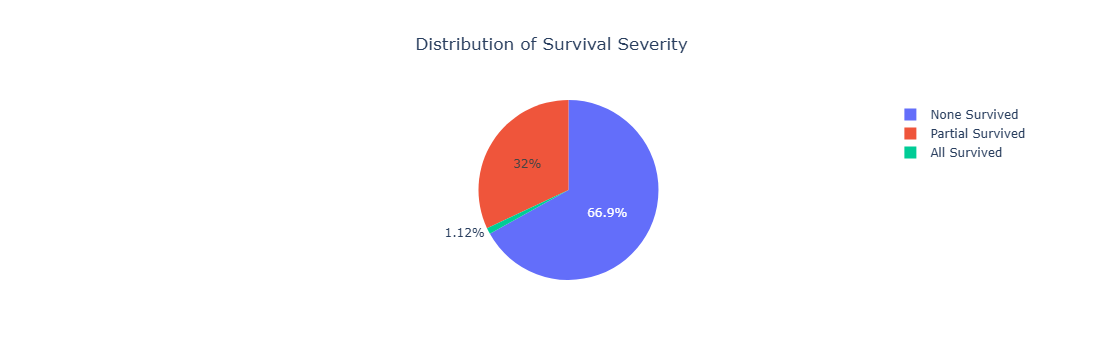

In [38]:
# Filter out 'Unknown' categoty
filtered_df = train_df[train_df['SurvivalSeverity'] != 'Unknown']

# Counts
severityCounts = filtered_df['SurvivalSeverity'].value_counts().reset_index()
severityCounts.columns = ['SurvivalSeverity', 'Count']

# Plot
fig14 = px.pie(
    severityCounts,
    names='SurvivalSeverity',
    values='Count',
    title='Distribution of Survival Severity',
    labels={'SurvivalSeverity': 'Survival Severity', 'Count': 'No. of Crashes'}
)

fig14.update_layout(
    title_x=0.5
)

fig14.show()

# **Part 2**: Geographical Analysis

**Part 2.1**: Analysis by the **Location Type** (Land, Watery)

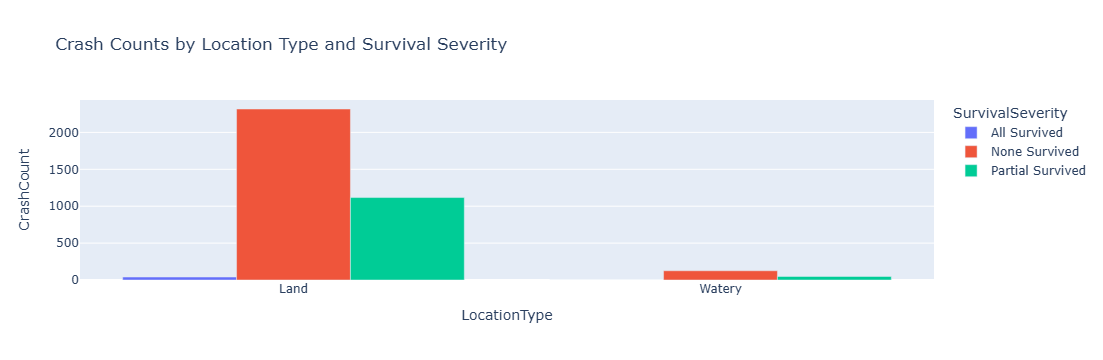

In [39]:
# Extract the count of crashes for each 'ServivalSeverity' catogory within 'LocationType' except the 'Unknown' category
crash_counts = train_df[train_df['LocationType'] != 'Unknown'].groupby(['LocationType', 'SurvivalSeverity']).size().reset_index(name='CrashCount')

# Plot the 'crash_counts' using grouped bar chart
fig = px.bar(
    crash_counts,
    x='LocationType',
    y='CrashCount',
    color='SurvivalSeverity',
    barmode='group',
    title='Crash Counts by Location Type and Survival Severity')
fig

**Part 2.2**: Analysis by **Land**

**Part 2.2.1**: Analysis by **Continent**

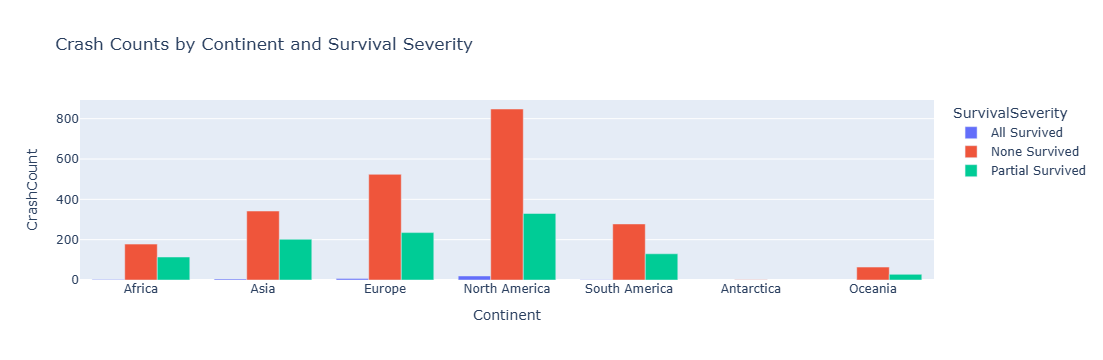

In [40]:
# Extract the count of 'SurvivalSeverity' categories except 'Unkown' within each 'Continent'
crash_counts = train_df[train_df['Continent'] != 'Unknown'].groupby(['Continent', 'SurvivalSeverity']).size().reset_index(name='CrashCount')

# Plot the 'crash_counts' using grouped bar chart
fig = px.bar(
    crash_counts,
    x='Continent',
    y='CrashCount',
    color='SurvivalSeverity',
    barmode='group',
    title='Crash Counts by Continent and Survival Severity')
fig

Analysis in **North America**

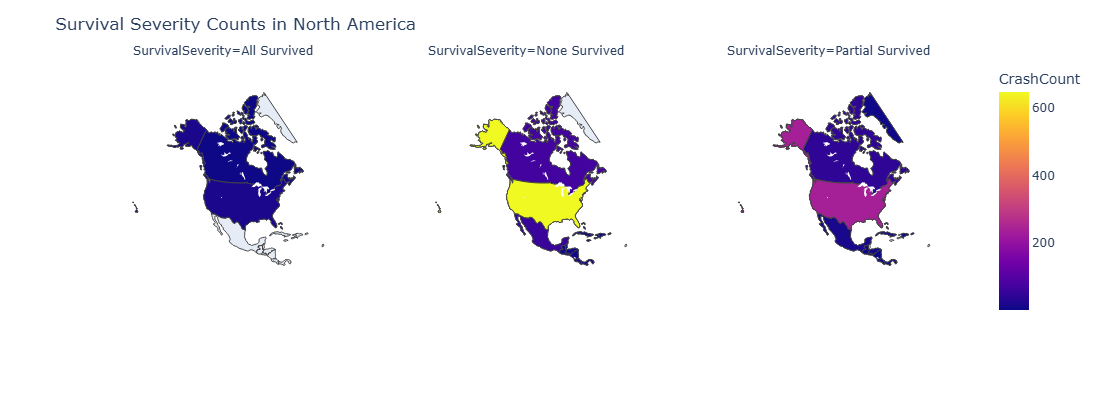

In [41]:
# Filter for North America and get counts
crash_counts = train_df[train_df['Continent'] == 'North America'].groupby(
    ['Country', 'SurvivalSeverity']).size().reset_index(name='CrashCount')

# Create a facet map for each SurvivalSeverity category
fig = px.choropleth(
    crash_counts,
    locations='Country',
    locationmode='country names',
    color='CrashCount',
    scope='north america',  # Focus on North America
    facet_col='SurvivalSeverity',  # Create separate maps for each category
    height=400,
    width=1000
)

# Update layout to make the maps side by side
fig.update_layout(
    title_text='Survival Severity Counts in North America',
    geo_scope='north america'  # Ensure we only show North America
)

fig.show()

Analysis in **Europe**

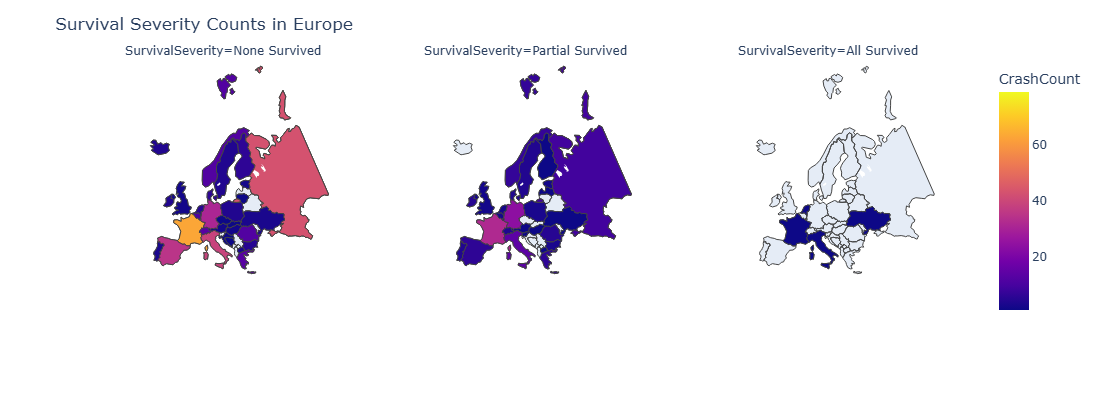

In [42]:
# Filter for Europe and get counts
crash_counts = train_df[train_df['Continent'] == 'Europe'].groupby(
    ['Country', 'SurvivalSeverity']).size().reset_index(name='CrashCount')

# Create a facet map for each SurvivalSeverity category
fig = px.choropleth(
    crash_counts,
    locations='Country',
    locationmode='country names',
    color='CrashCount',
    scope='europe',  # Focus on Europe
    facet_col='SurvivalSeverity',  # Create separate maps for each category
    height=400,
    width=1000
)

# Update layout to make the maps side by side
fig.update_layout(
    title_text='Survival Severity Counts in Europe',
    geo_scope='europe'  # Ensure we only show Europe
)

fig.show()

 **Part 2.2.2**: Analysis by **Country**




In [43]:
# Identify number of unique countries
train_df['Country'].nunique()

224

In [44]:
# How many crashes per each country
#print(train_df['Country'].value_counts().to_string())

**Word Cloud**: Number of Crashes per Country

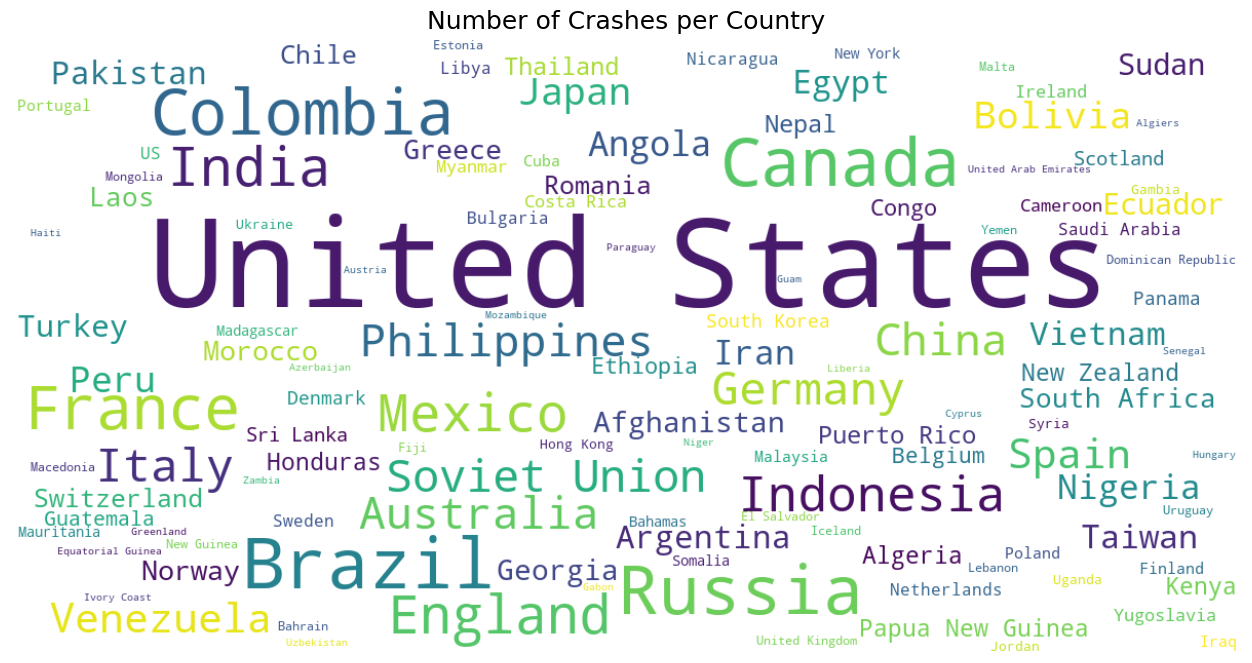

In [45]:
#! pip install wordcloud
from wordcloud import WordCloud

#Count no. of crashes per country
countryCounts = train_df['Country'].value_counts()
countryCounts = countryCounts[countryCounts.index != 'Unknown']

#Convert to dictionary
countryDict = countryCounts.to_dict()

#Generate word cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',
    max_font_size=120,
    min_font_size=10,
    prefer_horizontal=1.0
).generate_from_frequencies(countryDict)

#Plot
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Number of Crashes per Country', fontsize=18)

plt.show()

In [46]:
#Filter out 'Unknown' categoty
filtered_df = train_df[train_df['Country'] != 'Unknown']

#Count of each SurvivalSeverity category for each country
SeverityTable = pd.crosstab(filtered_df['Country'], filtered_df['SurvivalSeverity'])
SeverityTable

SurvivalSeverity,All Survived,None Survived,Partial Survived
Country,,,
Afghanistan,0,15,5
Alaska,0,1,1
Algeria,0,9,6
Algiers,0,2,1
American Samoa,0,0,1
...,...,...,...
Western Denmark,0,1,0
Yemen,0,2,2
Yugoslavia,0,7,2


The **Dominant** Survival Severity per Country



*   Each country is colored by the most frequent SurvivalSeverity from all its crashes





In [47]:
#Get the dominant category per country
dominant = train_df.groupby('Country')['SurvivalSeverity'].agg(lambda x: x.value_counts().idxmax()).reset_index()

#dominant[dominant['SurvivalSeverity'] =='Unknown']
#There is no country with dominant SurvivalSeverity 'Unknown'
dominant

,Country,SurvivalSeverity
0,Afghanistan,None Survived
1,Alaska,Partial Survived
2,Algeria,None Survived
3,Algiers,None Survived
4,American Samoa,Partial Survived
...,...,...
219,Western Denmark,None Survived
220,Yemen,Partial Survived
221,Yugoslavia,None Survived
222,Zambia,None Survived


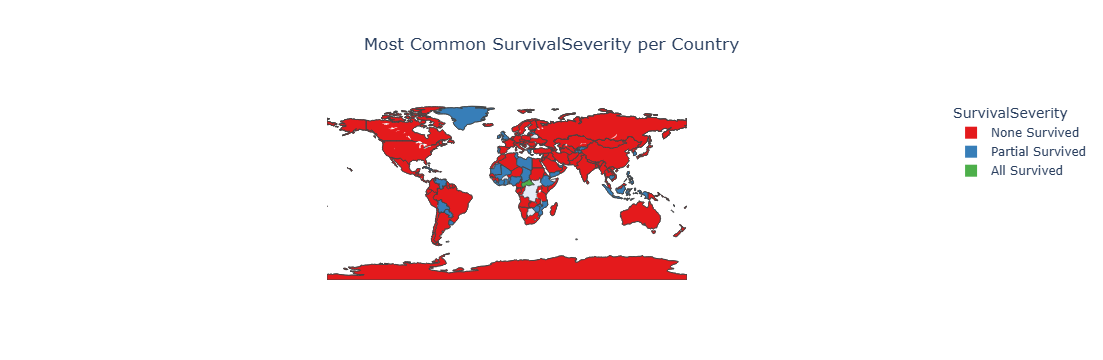

In [48]:
#Plot
fig1 = px.choropleth(
    dominant,
    locations="Country",
    locationmode="country names",
    color="SurvivalSeverity",
    title="Most Common SurvivalSeverity per Country",
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig1.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    title_x = 0.5
 )

fig1.show()

Severity Score per Country

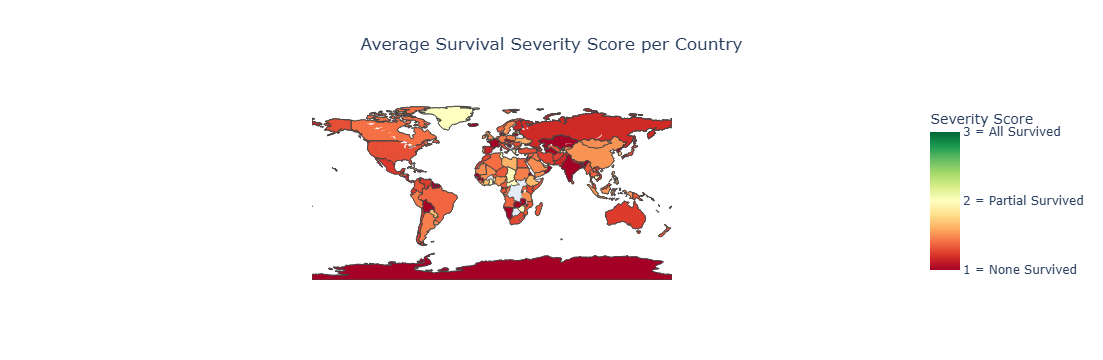

In [49]:
#Assign scores
scoreMap = {
    'All Survived': 3,
    'Partial Survived': 2,
    'None Survived': 1,
    'Unknown': 0
}

train_df['SeverityScore'] = train_df['SurvivalSeverity'].map(scoreMap)

#Average score per country
scoreByCountry = train_df.groupby('Country')['SeverityScore'].mean().reset_index()

#Plot
fig2 = px.choropleth(
    scoreByCountry,
    locations='Country',
    locationmode='country names',
    color='SeverityScore',
    color_continuous_scale='RdYlGn',
    range_color=(1,3),
    title='Average Survival Severity Score per Country'
)

#Customize color bar ticks and labels
fig2.update_layout(coloraxis_colorbar=dict(
    title='Severity Score',
    tickvals=[1,2,3],
    ticktext=[
        '1 = None Survived',
        '2 = Partial Survived',
        '3 = All Survived'
    ]
))

fig2.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    title_x = 0.5
 )

fig2.show()

**Proportion Stacked Bar Chart**: Proportional Distribution of SurvivalSeverity per Country



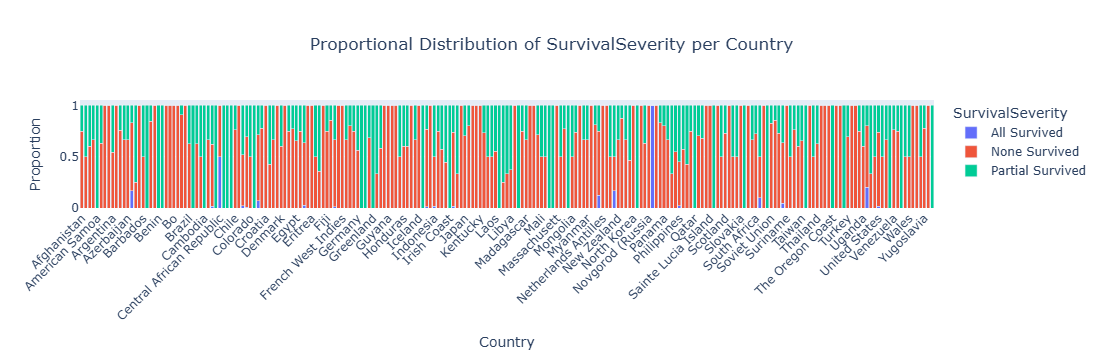

In [50]:
#Normalize each row to get proportions (otw big counties with many crashes may dominate every chart)
SeverityProportions = SeverityTable.div(SeverityTable.sum(axis=1), axis=0)

#Reset index and melt for plotting
SeverityProportions = SeverityProportions.reset_index().melt(id_vars='Country', var_name='SurvivalSeverity', value_name='Proportion')

#Plot
fig3 = px.bar(
    SeverityProportions,
    x='Country',
    y='Proportion',
    color='SurvivalSeverity',
    title='Proportional Distribution of SurvivalSeverity per Country',
    labels={'Proportion': 'Proportion', 'Country': 'Country', 'SurvivalSeverity': 'SurvivalSeverity'},
    hover_data={'Proportion': ':.2f'} #Show proportion as 2 decimal places
)

fig3.update_layout(
    barmode='stack',
    xaxis_tickangle=-45,
    title_x=0.5
)

fig3.show()

* Above bar chart plots all 227 countries. But, since there are many names in x axis, plotly has skipped some country names.

**Proportion Stacked Bar Chart**: Filtered for Top 10 Crashes

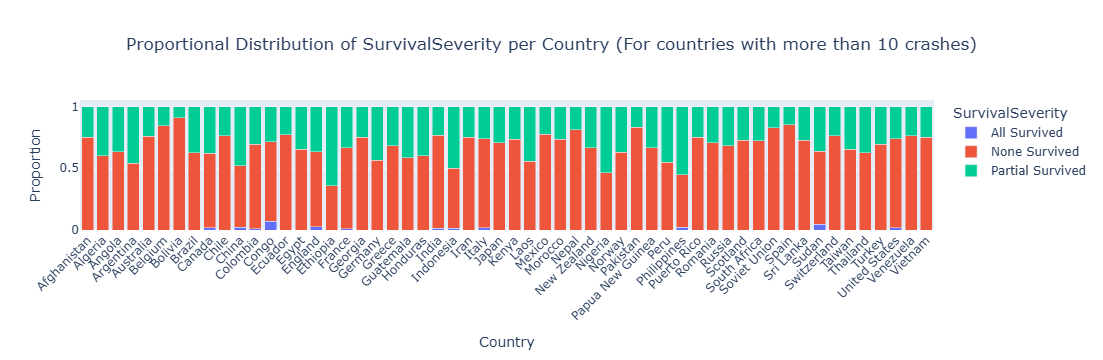

In [51]:
#Calculate total crashes per country
totalCrashes = SeverityTable.sum(axis=1)

#Get counties with more than 10 crash
eligibleCountries = totalCrashes[totalCrashes > 10].index

#Filter proportion table
filtered = SeverityProportions[SeverityProportions['Country'].isin(eligibleCountries)]

#Plot
fig4 = px.bar(
    filtered,
    x='Country',
    y='Proportion',
    color='SurvivalSeverity',
    title='Proportional Distribution of SurvivalSeverity per Country (For countries with more than 10 crashes)',
    labels={'Proportion': 'Proportion', 'Country': 'Country', 'SurvivalSeverity': 'SurvivalSeverity'},
    hover_data={'Proportion': ':.2f'} #Show proportion as 2 decimal places
)

fig4.update_layout(
    barmode='stack',
    xaxis_tickangle=-45,
    title_x=0.5
)

fig4.show()

Analysis in **United States**

In [52]:
#Filter rows
us_df = train_df[train_df['Country'] == 'United States']
us_df

,Year,Month,DayPeriod,Type,Operator,LocationType,Continent,Country,WaterBodyType,WaterBodyName,FederalSubject,CauseCategory,WeatherCondition,Survivors,FlightPhase,Aboard,Ground,Fatalities,SurvivalSeverity,SeverityScore
0,2000,Aug,Morning,Piper Navajo PA-31/ Piper Seminole PA-44,Patuxent Airways / Private,Land,North America,United States,Unknown,Unknown,New Jersey,Unknown,Unknown,No,Unknown,11,0,11,None Survived,1
8,1976,Aug,Morning,Cessna 185,Green River Aviation - Air Taxi,Land,North America,United States,Unknown,Unknown,Utah,Weather,Rain,No,Takeoff,3,0,3,None Survived,1
13,1990,Aug,Night,Bell BHT-206-B Helicopter,Private - Omniflight Helicopters,Land,North America,United States,Unknown,Unknown,Wisconsin,Weather,Fog,No,Unknown,5,0,5,None Survived,1
17,1953,Sep,Morning,Convair CV-240-0,American Airlines,Land,North America,United States,Unknown,Unknown,New York,Weather,Fog,No,Landing,28,0,28,None Survived,1
18,1971,Apr,Evening,Beechcraft C35,New England Aviaiton,Land,North America,United States,Unknown,Unknown,New Hampshire,Mechanical,Unknown,No,Takeoff,4,0,4,None Survived,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,1920,Mar,Unknown,De Havilland DH-4,US Aerial Mail Service,Land,North America,United States,Unknown,Unknown,New Jersey,Unknown,Unknown,No,Unknown,1,0,1,None Survived,1
3649,1983,Oct,Evening,Hawker Siddeley HS-748-FAA,Air Illinois,Land,North America,United States,Unknown,Unknown,Illinois,Mechanical,Unknown,No,Unknown,10,0,10,None Survived,1
3651,1997,Jan,Evening,Cessna 208B Grand Caravan,Tar Heel Aviation,Land,North America,United States,Unknown,Unknown,North Carolina,Weather,Fog,No,Landing,2,0,2,None Survived,1
3662,1986,Aug,Morning,Howard 250,Southwest Airlift,Land,North America,United States,Unknown,Unknown,Arkansas,Unknown,Unknown,No,Takeoff,2,0,2,None Survived,1


In [53]:
# States
us_df['FederalSubject'].unique()

array(['New Jersey', 'Utah', 'Wisconsin', 'New York', 'New Hampshire',
       'Washington', 'California', 'Indiana', 'New Mexico', 'Hawaii',
       'Michigan', 'Ohio', 'North Carolina', 'Mississippi', 'Colorado',
       'Kansas', 'Unknown', 'Oregon', 'Delaware', 'Alaska', 'Texas',
       'Louisiana', 'Florida', 'Oklahoma', 'Rhode Island', 'Nevada',
       'Arkansas', 'Pennsylvania', 'Maryland', 'Arizona', 'Illinois',
       'Montana', 'South Carolina', 'Alabama', 'Massachusetts', 'Maine',
       'West Virginia', 'Wyoming', 'Vermont', 'Idaho', 'North Dakota',
       'Virginia', 'Iowa', 'Kentucky', 'Missouri', 'Tennessee',
       'Connecticut', 'Minnesota', 'Nebraska', 'South Dakota'],
      dtype=object)

In [54]:
#Filter out 'Unknown' categoty
us_df = us_df[us_df['FederalSubject'] != 'Unknown']

#Count occurrences of each state
crashesPerState = us_df['FederalSubject'].value_counts().reset_index()
crashesPerState.columns = ['FederalSubject', 'Count']

#To locationmode = 'US-states' to work properly states should be in two-letter state abbreviations
#Dictionary mapping full state names to their two-letter codes
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

crashesPerState['StateCode'] = crashesPerState['FederalSubject'].map(state_abbrev)
crashesPerState

,FederalSubject,Count,StateCode
0,Alaska,114,AK
1,California,97,CA
2,Texas,39,TX
3,New York,33,NY
4,Ohio,32,OH
5,Pennsylvania,29,PA
6,Illinois,28,IL
7,Washington,27,WA
8,Florida,27,FL
9,New Jersey,26,NJ


**Part 2.2.3**: Analysis by **Federal-Subjects/State**

**Part 2.2.3.1**: Based on **USA** States

**Bar Chart**: Number of Crashes per State

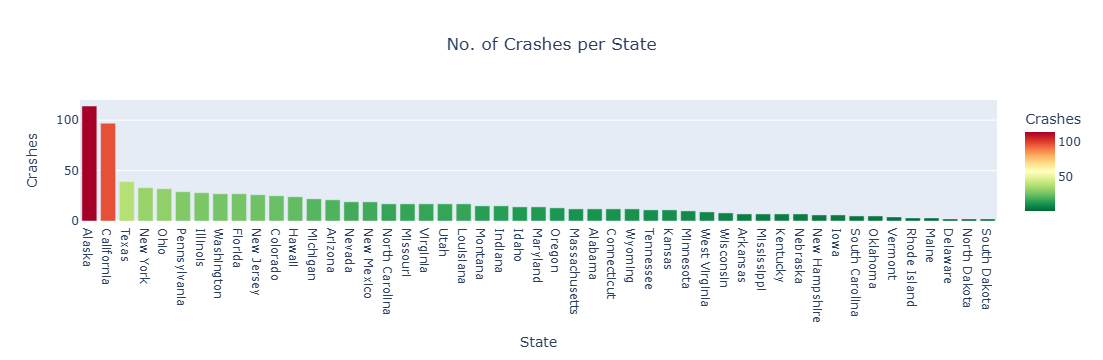

In [55]:
#Plot
fig15 = px.bar(
    crashesPerState,
    x='FederalSubject',
    y='Count',
    title='No. of Crashes per State',
    labels={'Count': 'Crashes', 'FederalSubject': 'State'},
    color='Count',
    color_continuous_scale='RdYlGn_r'
)

fig15.update_layout(
    title_x=0.5
)

fig15.show()

**Geo-location HeatMap**: Crash Count by US State

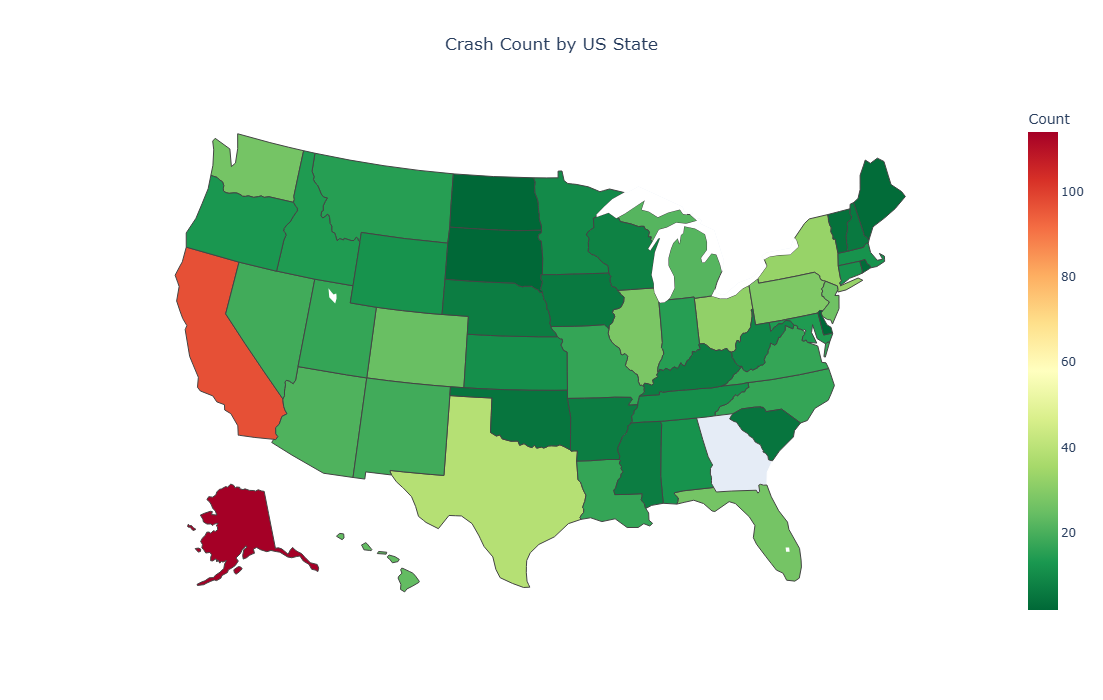

In [56]:
fig16 = px.choropleth(
    crashesPerState,
    locations='StateCode',
    locationmode='USA-states',
    color='Count',
    scope='usa',
    color_continuous_scale='RdYlGn_r',
    hover_name='FederalSubject',
    title='Crash Count by US State',
    width=1000,
    height=700
)

fig16.update_layout(
    title_x=0.5
)

fig16.show()

The **Dominant** Survival Severity per State

C:\Users\DINITHI\AppData\Local\Temp\ipykernel_25636\312316561.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



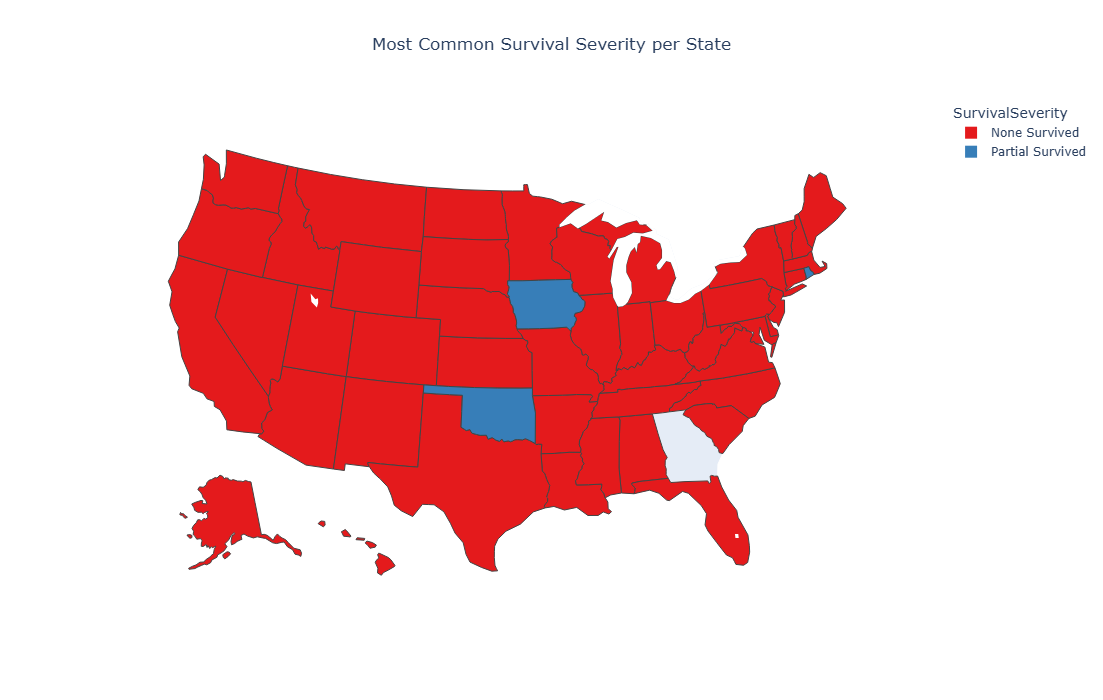

In [57]:
#Adding stateCodes to the data set
us_df['StateCode'] = us_df['FederalSubject'].map(state_abbrev)

#Get the dominant category per state
stateDominant =us_df.groupby(['StateCode', 'FederalSubject'])['SurvivalSeverity'].agg(lambda x: x.value_counts().idxmax()).reset_index()

#Plot
fig17 = px.choropleth(
    stateDominant,
    locations="StateCode",
    locationmode="USA-states",
    color="SurvivalSeverity",
    scope='usa',
    title="Most Common Survival Severity per State",
    color_discrete_sequence=px.colors.qualitative.Set1,
    hover_name='FederalSubject'
)

fig17.update_layout(
    title_x = 0.5,
    width=1000,
    height=700
 )

fig17.show()

**Severity Score** per State

C:\Users\DINITHI\AppData\Local\Temp\ipykernel_25636\3371956721.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



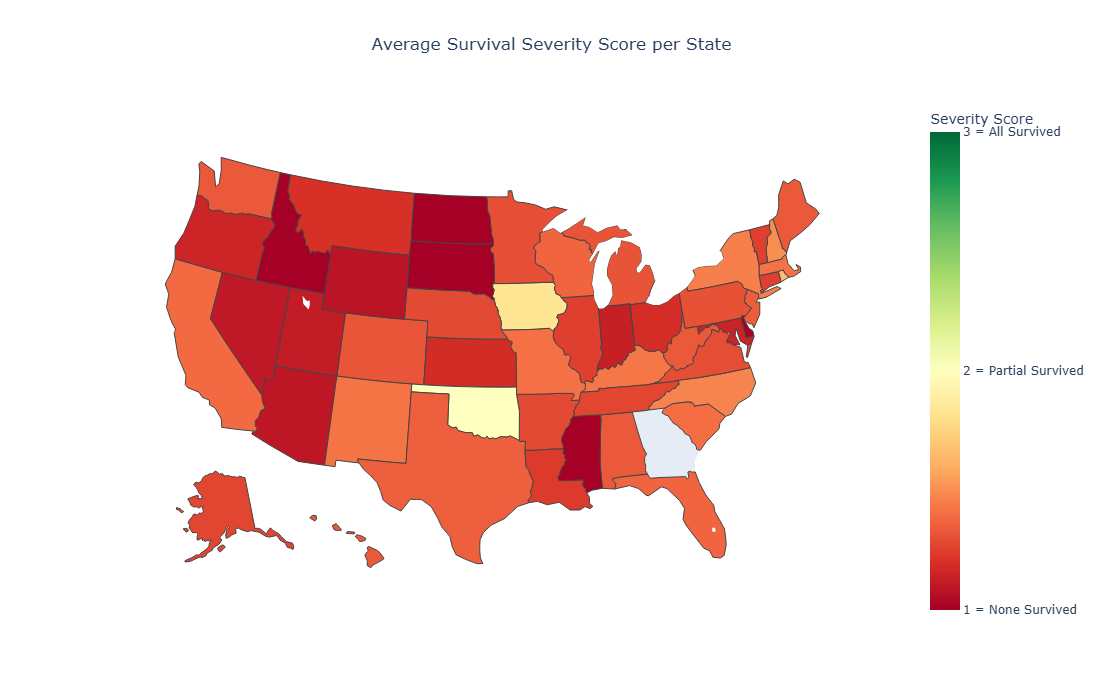

In [58]:
us_df['SeverityScore'] =us_df['SurvivalSeverity'].map(scoreMap)

#Average score per State
scoreByState = us_df.groupby(['StateCode', 'FederalSubject'])['SeverityScore'].mean().reset_index()

#Plot
fig18 = px.choropleth(
    scoreByState,
    locations="StateCode",
    locationmode="USA-states",
    color='SeverityScore',
    scope='usa',
    color_continuous_scale='RdYlGn',
    range_color=(1,3),
    title='Average Survival Severity Score per State',
    hover_name='FederalSubject'
)

#Customize color bar ticks and labels
fig18.update_layout(coloraxis_colorbar=dict(
    title='Severity Score',
    tickvals=[1,2,3],
    ticktext=[
        '1 = None Survived',
        '2 = Partial Survived',
        '3 = All Survived'
      ]
))

fig18.update_layout(
    title_x = 0.5,
    width=1000,
    height=700
 )

fig18.show()

**Proportion Stacked Bar Chart**: Proportional Distribution of Survival Severity per State

In [59]:
#Count of each SurvivalSeverity category for each state
SeverityTable = pd.crosstab(us_df['FederalSubject'], us_df['SurvivalSeverity'])
SeverityTable

#Normalize each row to get proportions
SeverityProportions = SeverityTable.div(SeverityTable.sum(axis=1), axis=0)

#Reset index and melt for plotting
SeverityProportions = SeverityProportions.reset_index().melt(id_vars='FederalSubject', var_name='SurvivalSeverity', value_name='Proportion')
SeverityProportions

,FederalSubject,SurvivalSeverity,Proportion
0,Alabama,All Survived,0.000000
1,Alaska,All Survived,0.008772
2,Arizona,All Survived,0.000000
3,Arkansas,All Survived,0.000000
4,California,All Survived,0.061856
...,...,...,...
142,Virginia,Partial Survived,0.176471
143,Washington,Partial Survived,0.259259
144,West Virginia,Partial Survived,0.333333
145,Wisconsin,Partial Survived,0.375000


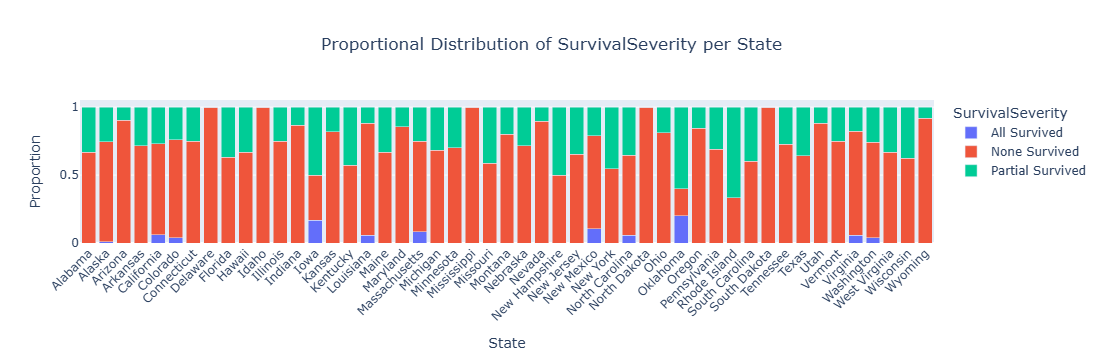

In [60]:
#Plot
fig19 = px.bar(
    SeverityProportions,
    x='FederalSubject',
    y='Proportion',
    color='SurvivalSeverity',
    title='Proportional Distribution of SurvivalSeverity per State',
    labels={'Proportion': 'Proportion', 'FederalSubject': 'State', 'SurvivalSeverity': 'SurvivalSeverity'},
    hover_data={'Proportion': ':.2f'} #Show proportion as 2 decimal places
)

fig19.update_layout(
    barmode='stack',
    xaxis_tickangle=-45,
    title_x=0.5
)

fig19.show()

**Part 2.2.3.2**: Based on Other States

In [61]:
# Identify number of FederalSubject in the data set
train_df['FederalSubject'].nunique()


281

In [62]:
# Create a clean dataframe by removing 'Unknown' entries
clean_df = train_df[train_df['FederalSubject'] != 'Unknown'].copy()

# Count how many rows were removed
removed_count = len(train_df) - len(clean_df)
print(f"Removed {removed_count} rows with 'Unknown' FederalSubject")

Removed 2329 rows with 'Unknown' FederalSubject


In [63]:
# Count crashes per FederalSubject
crash_counts = clean_df['FederalSubject'].value_counts().reset_index()
crash_counts.columns = ['FederalSubject', 'CrashCount']

# Display the results
crash_counts

,FederalSubject,CrashCount
0,Alaska,114
1,California,97
2,Texas,39
3,New York,37
4,Ohio,32
...,...,...
275,Antigua,1
276,Afghanstan,1
277,Belarus,1
278,South Yemen,1


In [64]:
# FederalSubject of each SurvivalSeverity category for each FederalSubject
SeverityTableFedaral = pd.crosstab(clean_df['FederalSubject'], train_df['SurvivalSeverity'])
SeverityTableFedaral

SurvivalSeverity,All Survived,None Survived,Partial Survived
FederalSubject,,,
10 mile SE of Tell City,0,1,0
10 miles SW of Las Vegas,0,1,0
ACT,0,1,0
AK,0,1,1
Aaland Island,0,0,1
...,...,...,...
Wyoming,0,11,1
Yukon Territory,0,1,0
Zaire,0,4,6


The **Dominant** Survival Severity per Federal-Subject

In [65]:
# Get the most common SurvivalSeverity for each FederalSubject
highest_severity = clean_df.groupby('FederalSubject')['SurvivalSeverity'] \
                          .apply(lambda x: x.value_counts().idxmax()) \
                          .reset_index()
highest_severity.columns = ['FederalSubject', 'MostCommonSurvivalSeverity']

# Display the result
print("Most common SurvivalSeverity for each FederalSubject:")
display(highest_severity)

Most common SurvivalSeverity for each FederalSubject:


,FederalSubject,MostCommonSurvivalSeverity
0,10 mile SE of Tell City,None Survived
1,10 miles SW of Las Vegas,None Survived
2,ACT,None Survived
3,AK,None Survived
4,Aaland Island,Partial Survived
...,...,...
275,Wyoming,None Survived
276,Yukon Territory,None Survived
277,Zaire,Partial Survived
278,Zaïre,None Survived


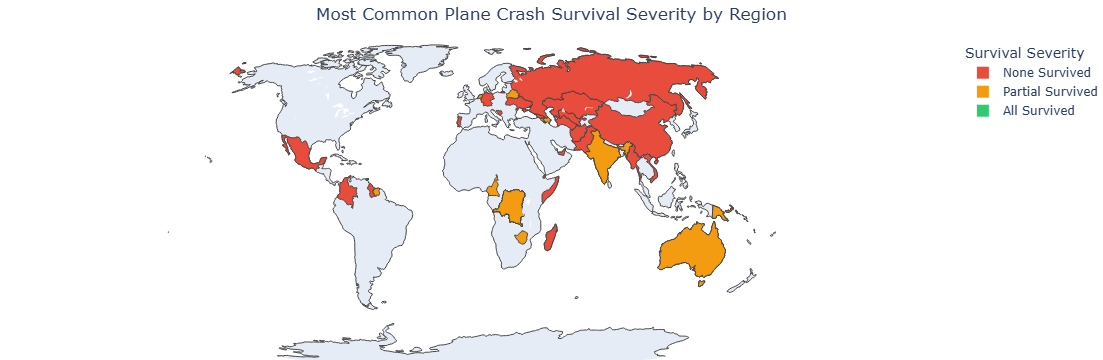

In [66]:
# Plot for the most common SurvivalSeverity for each FederalSubject
import plotly.express as px

# First get the most common SurvivalSeverity for each FederalSubject
highest_severity = clean_df.groupby('FederalSubject')['SurvivalSeverity'] \
                          .apply(lambda x: x.value_counts().idxmax()) \
                          .reset_index()
highest_severity.columns = ['FederalSubject', 'MostCommonSeverity']

# Create the choropleth map
fig = px.choropleth(
    highest_severity,
    locations="FederalSubject",  # Your region names
    locationmode="country names",  # Try other modes if needed
    color="MostCommonSeverity",   # The column with your survival categories
    title="Most Common Plane Crash Survival Severity by Region",
    color_discrete_map={  # Custom colors for each category
        'All Survived': '#2ecc71',    # Green
        'Partial Survived': '#f39c12', # Orange
        'None Survived': '#e74c3c'     # Red
    },
    hover_name="FederalSubject",  # Show region name on hover
    hover_data={"MostCommonSeverity": True, "FederalSubject": False}  # Customize hover
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'  # Try 'equirectangular' or 'robinson'
    ),
    margin={"r":0,"t":40,"l":0,"b":0},
    title_x=0.5,
    legend_title_text='Survival Severity'
)

# Show the plot
fig.show()

**Grouped Bar Chart**: Proportional Distribution of Survival Severity per Federal Subject

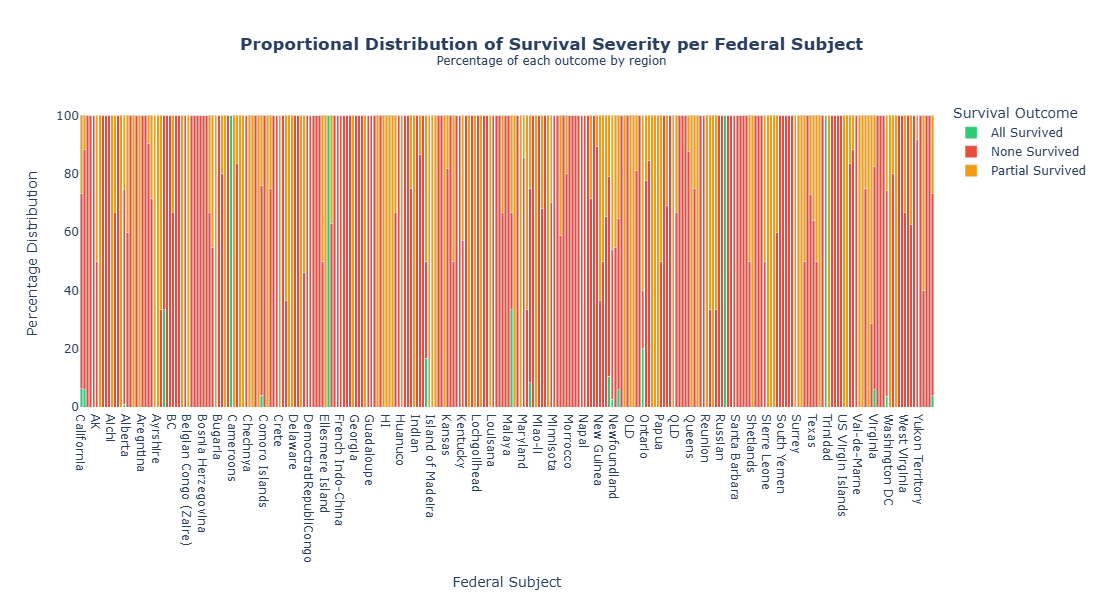

In [67]:
import plotly.express as px
import pandas as pd

# 1. Calculate proportions (fixed version)
proportions = (clean_df.groupby(['FederalSubject', 'SurvivalSeverity'])
                     .size()
                     .unstack(fill_value=0)
                     .apply(lambda x: 100 * x / x.sum(), axis=1)
                     .stack()
                     .reset_index(name='Percentage'))

# 2. Define color mapping
color_map = {
    'All Survived': '#2ecc71',    # Green
    'Partial Survived': '#f39c12', # Orange
    'None Survived': '#e74c3c'     # Red
}

# 3. Create interactive stacked bar chart
fig = px.bar(proportions,
             x='FederalSubject',
             y='Percentage',
             color='SurvivalSeverity',
             title='<b>Proportional Distribution of Survival Severity per Federal Subject</b><br><sup>Percentage of each outcome by region</sup>',
             color_discrete_map=color_map,
             barmode='stack',
             hover_data={'Percentage': ':.1f%'},
             labels={'Percentage': 'Proportion (%)'},
             height=600)

# 4. Customize layout
fig.update_layout(
    xaxis_title='Federal Subject',
    yaxis_title='Percentage Distribution',
    legend_title='Survival Outcome',
    hovermode='x unified',
    xaxis={'categoryorder': 'total descending'},
    title_x=0.5,
    plot_bgcolor='white'
)

# 5. Format hover template
fig.update_traces(hovertemplate='%{y:.1f}%')

fig.show()

**Top 10** Federal-Subjects by Crash Count

<Figure size 1200x600 with 0 Axes>

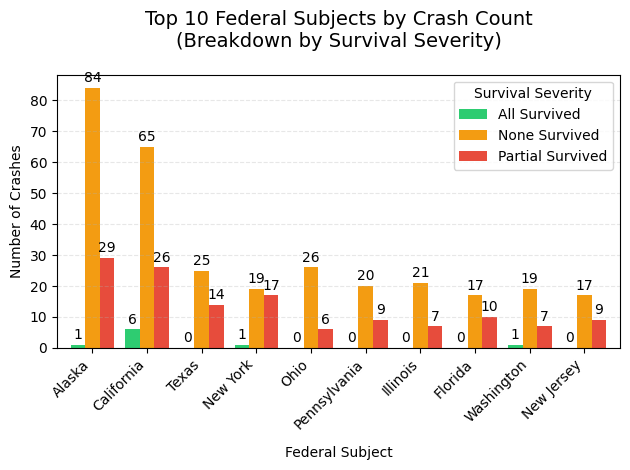

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Get top 10 FederalSubjects by total crash count
top_10_regions = clean_df['FederalSubject'].value_counts().head(10).index

# 2. Filter data for these regions
top_10_data = clean_df[clean_df['FederalSubject'].isin(top_10_regions)]

# 3. Create cross-tabulation
crash_counts = pd.crosstab(top_10_data['FederalSubject'], top_10_data['SurvivalSeverity'])

# 4. Sort by total crashes (descending)
crash_counts['Total'] = crash_counts.sum(axis=1)
crash_counts = crash_counts.sort_values('Total', ascending=False).drop('Total', axis=1)

# 5. Define colors
colors = ['#2ecc71', '#f39c12', '#e74c3c']  # Green, Orange, Red

# 6. Create the plot
plt.figure(figsize=(12, 6))
crash_counts.plot(kind='bar',
                 stacked=False,
                 color=colors,
                 width=0.8)

# 7. Customize the plot
plt.title('Top 10 Federal Subjects by Crash Count\n(Breakdown by Survival Severity)', pad=20, fontsize=14)
plt.xlabel('Federal Subject', labelpad=10)
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Survival Severity')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 8. Add value labels on bars
for container in plt.gca().containers:
    plt.bar_label(container,
                 label_type='edge',
                 padding=2,
                 fmt='%d')

plt.tight_layout()
plt.show()

# **Part 3:** Temporal Analysis

**Part 3.1**: Analysis by **Year**

Number of Crashes per Year

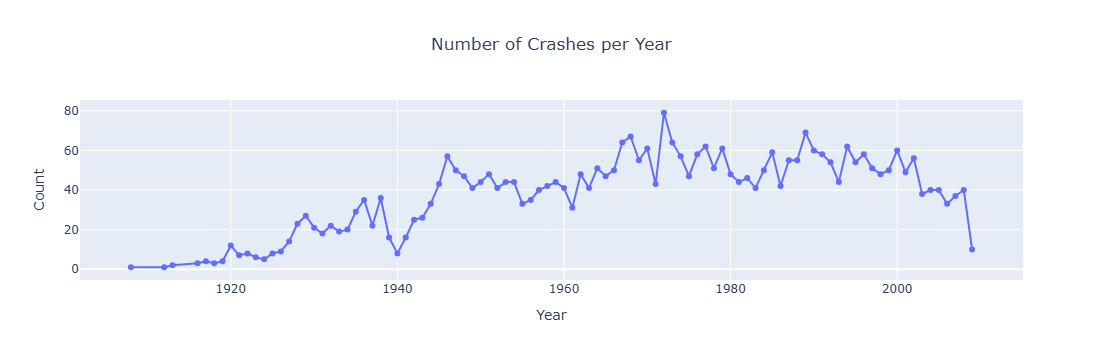

In [69]:
# Count crashes per year
crashesPerYear = train_df['Year'].value_counts().sort_index()

# Convert to a data frame
crashesPerYear_df = crashesPerYear.reset_index()
crashesPerYear_df.columns = ['Year', 'CrashCount']

fig9 = px.line(
    crashesPerYear_df,
    x='Year',
    y='CrashCount',
    markers=True,
    title='Number of Crashes per Year',
    labels={'CrashCount': 'Count', 'Year': 'Year'}
)

fig9.update_layout(
    title_x=0.5
)

fig9.show()

 * **Stacked Area Chart** of Proportions Over Time

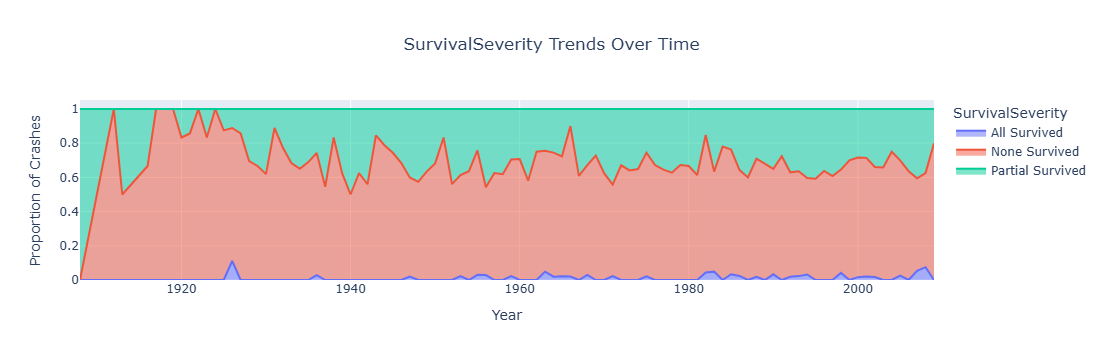

In [70]:
# Group and normalize per year
yearlyCounts = pd.crosstab(train_df['Year'], train_df['SurvivalSeverity'])
yearlyProps = yearlyCounts.div(yearlyCounts.sum(axis=1), axis=0).reset_index()

# Melt for plotting
yearlyMelted = yearlyProps.melt(id_vars='Year', var_name='SurvivalSeverity', value_name='Proportion')

# Plot
fig5 = px.area(
    yearlyMelted,
    x='Year',
    y='Proportion',
    color='SurvivalSeverity',
    title='SurvivalSeverity Trends Over Time',
    labels={'Proportion': 'Proportion of Crashes'}
)

fig5.update_layout(
    title_x=0.5
)

fig5.show()

* This plot shows proportion of each SurvivalSeverity class per year **by area**. Before 1940 most years are dominated by None Survived class (red). So **earlier aviation crashes were often more fatal**. Starting from 1920s to 2000s, the proportion (area) of partial survival becomes more consistent and increases slightly, indicating **gradual improvement in survival chances over time**. All survival is present but very low and inconsistent across all years.

* **Line Chart** of Each Survival Severity Class Over Time (Plot seperate lines per class)

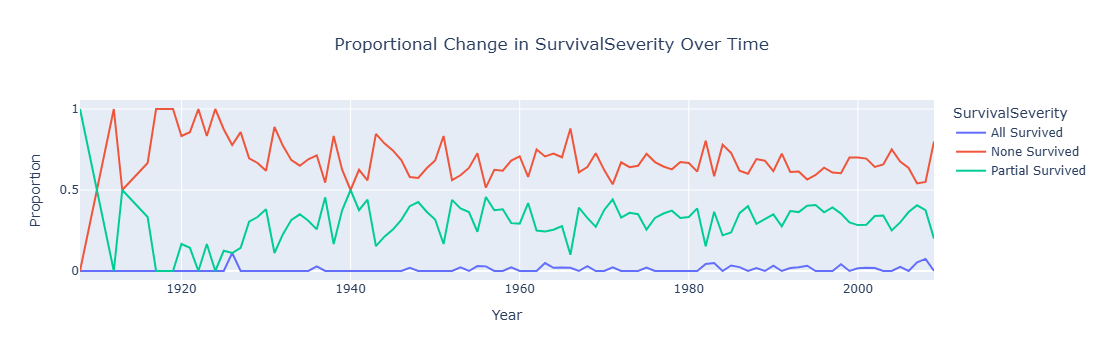

In [71]:
fig6 = px.line(
    yearlyMelted,
    x='Year',
    y='Proportion',
    color='SurvivalSeverity',
    title='Proportional Change in SurvivalSeverity Over Time'
)

fig6.update_layout(
    title_x=0.5
)

fig6.show()

# **Comparing Pre and Post 1980**
1980 is used in aviation research as a symbolic boundary between the early era and modern era

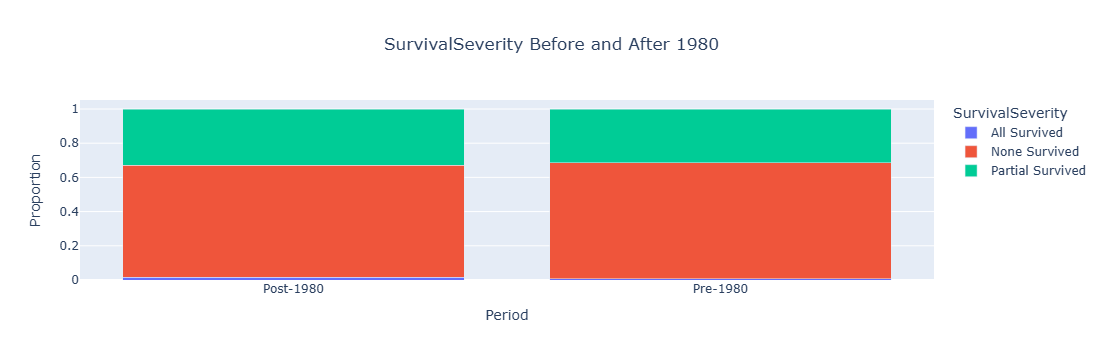

In [72]:
train_df['Period'] = train_df['Year'].apply(lambda x: 'Pre-1980' if x<1980 else 'Post-1980')
periodCounts = pd.crosstab(train_df['Period'], train_df['SurvivalSeverity'])
periodProps = periodCounts.div(periodCounts.sum(axis=1), axis=0).reset_index()

#Melt for plot
meltedPeriod = periodProps.melt(id_vars='Period', var_name='SurvivalSeverity', value_name='Proportion')

#plot
fig7 = px.bar(
    meltedPeriod,
    x='Period',
    y='Proportion',
    color='SurvivalSeverity',
    barmode='stack',
    title='SurvivalSeverity Before and After 1980'
)

fig7.update_layout(
    title_x=0.5
)

fig7.show()

**Part 3.2**: Analysis by **Month**

* **Bar Chart** of Crashes per Month

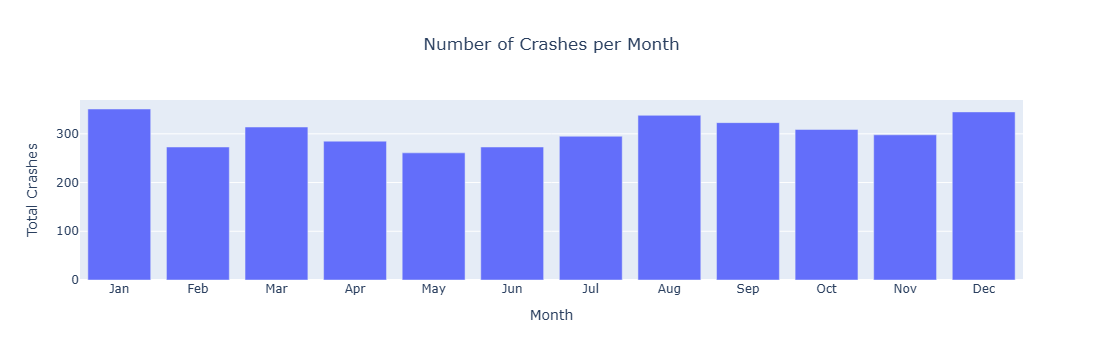

In [73]:
#Count crashes of each Month
MonthlyCrashes = train_df['Month'].value_counts().reset_index()
MonthlyCrashes.columns = ['Month', 'Count']

# Define correct month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#Ensure Month column uses cotegorical ordering
MonthlyCrashes['Month'] = pd.Categorical(
    MonthlyCrashes['Month'],
    categories=month_order,
    ordered=True
)

#Sort by calender order
MonthlyCrashes = MonthlyCrashes.sort_values('Month')

#Plot
fig20 = px.bar(
    MonthlyCrashes,
    x='Month',
    y='Count',
    title='Number of Crashes per Month',
    labels={'Month': 'Month', 'Count': 'Total Crashes'}
)

fig20.update_layout(
    title_x=0.5
)

fig20.show()

# **Part 4:** Temporal Analysis

In [74]:
train_df

,Year,Month,DayPeriod,Type,Operator,LocationType,Continent,Country,WaterBodyType,WaterBodyName,...,CauseCategory,WeatherCondition,Survivors,FlightPhase,Aboard,Ground,Fatalities,SurvivalSeverity,SeverityScore,Period
0,2000,Aug,Morning,Piper Navajo PA-31/ Piper Seminole PA-44,Patuxent Airways / Private,Land,North America,United States,Unknown,Unknown,...,Unknown,Unknown,No,Unknown,11,0,11,None Survived,1,Post-1980
1,1987,Nov,Evening,de Havilland Canada DHC-4A Caribou,Kenn Borek Air,Watery,North America,Canada,River,"Ross River,",...,Weather,Rain,No,Unknown,4,0,2,Partial Survived,2,Post-1980
2,1985,Dec,Morning,McDonnell Douglas DC-8 Super 63PF,Arrow Airways,Land,North America,Canada,Unknown,Unknown,...,Unknown,Unknown,No,Takeoff,256,0,256,None Survived,1,Post-1980
3,1966,Aug,Unknown,Ilyushin IL-14,Tarom,Land,Europe,Romania,Unknown,Unknown,...,Unknown,Unknown,No,En Route,24,0,24,None Survived,1,Pre-1980
4,1958,Apr,Evening,de Havilland DH-114 Heron 2D,Aviaco,Land,Europe,Spain,Unknown,Unknown,...,Unknown,Unknown,No,Takeoff,16,0,16,None Survived,1,Pre-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,1952,May,Morning,Handley Page HP-81 Hermes IV,British Overseas Airways,Land,Africa,Mauritania,Unknown,Unknown,...,Unknown,Unknown,Yes,Landing,18,0,1,Partial Survived,2,Pre-1980
3661,1999,Feb,Afternoon,Tupolev TU-154,China Southwest Airlines,Land,Asia,China,Unknown,Unknown,...,Unknown,Unknown,No,Landing,61,0,61,None Survived,1,Post-1980
3662,1986,Aug,Morning,Howard 250,Southwest Airlift,Land,North America,United States,Unknown,Unknown,...,Unknown,Unknown,No,Takeoff,2,0,2,None Survived,1,Post-1980
3663,1952,Jan,Unknown,Junkers JU-52/3m,Air France,Land,Africa,Madagascar,Unknown,Unknown,...,Unknown,Unknown,No,Unknown,11,0,6,Partial Survived,2,Pre-1980


# **Part 5:** Operator-Specific Analysis

In [75]:
# Identify number of unique operators
train_df['Operator'].nunique()

1869

In [76]:
# How many crashes per each operator
#print(train_df['Operator'].value_counts().to_string())

# **Word Cloud:** No. of Crashes per Operator

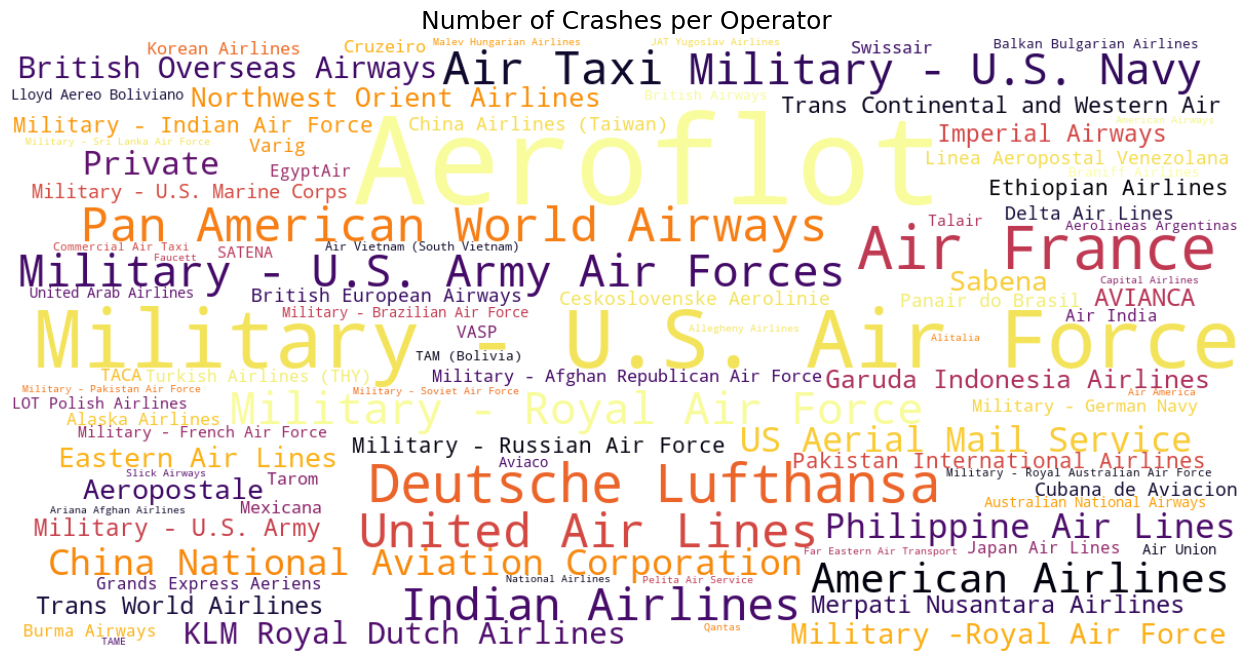

In [77]:
# Count no. of crashes per operator
operatorCounts = train_df['Operator'].value_counts()
operatorCounts = operatorCounts[operatorCounts.index != 'Unknown']

# Convert to dictionary
operatorDict = operatorCounts.to_dict()

# Generate word cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='inferno',
    max_font_size=120,
    min_font_size=10,
    prefer_horizontal=1.0
).generate_from_frequencies(operatorDict)

# Plot
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Number of Crashes per Operator', fontsize=18)

plt.show()

In [78]:
# Since plotting with 1869 airlines can be overwhelming, select airlines with more than 5 crashes

# Filter airlines
validOperators = operatorCounts[operatorCounts >= 5].index

filtered_df = train_df[train_df['Operator'].isin(validOperators)]
#filtered_df

filtered_df['Operator'].nunique()

110

# **Stacked bar Chart**

In [79]:
table = pd.crosstab(filtered_df['Operator'], filtered_df['SurvivalSeverity'])
tableProp = table.div(table.sum(axis=1), axis=0).reset_index()
df_melted = tableProp.melt(id_vars='Operator', var_name='SurvivalSeverity', value_name='Proportion')

# Plot
fig8 = px.bar(
    df_melted,
    x='Operator',
    y='Proportion',
    color='SurvivalSeverity',
    title='Survival Severity per Operators (with more than 5 crashes)',
    barmode='stack',
    labels={'Proportion': 'Proportion', 'Operator': 'Operator'}
)

fig8.update_layout(
    xaxis_tickangle=-45,
    title_x=0.5
)

fig8.show()

# **Average Severity Score per Operator**

In [80]:
# Assign scores
scoreMap = {
    'All Survived': 3,
    'Partial Survived': 2,
    'None Survived': 1,
    'Unknown': 0
}

filtered_df['SeverityScore'] = filtered_df['SurvivalSeverity'].map(scoreMap)

# Calculate average severity score per operator
avgSeverityByOperator = filtered_df.groupby('Operator')['SeverityScore'].mean().reset_index()

# Plot
fig10 = px.bar(
    avgSeverityByOperator,
    x='Operator',
    y='SeverityScore',
    title='Average Severity Score per Operator',
    labels={'SeverityScore': 'Avg Severity Score', 'Operator': 'Operator'},
    color='SeverityScore',
    color_continuous_scale='RdYlGn'
)

fig10.update_layout(
    title_x=0.5
)

fig10.show()

C:\Users\DINITHI\AppData\Local\Temp\ipykernel_25636\1169074158.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **Other Plots**

# **FlightPhase variable**

In [81]:
# Categories
train_df['FlightPhase'].unique()

array(['Unknown', 'Takeoff', 'En Route', 'Landing'], dtype=object)

In [82]:
# Filter out 'Unknown' categoty
filtered_df = train_df[train_df['FlightPhase'] != 'Unknown']

# Count occurrences of each flight phase
phaseCounts = filtered_df['FlightPhase'].value_counts().reset_index()
phaseCounts.columns = ['FlightPhase', 'Count']

# Plot
fig11 = px.pie(
    phaseCounts,
    names='FlightPhase',
    values='Count',
    title='Distribution of Flight Phase',
    labels={'FlightPhase': 'Flight Phase', 'Count': 'No. of Crashes'}
)

fig11.update_layout(
    title_x=0.5
)

fig11.show()

# **WeatherCondition Variable**

In [83]:
# Categories
train_df['WeatherCondition'].unique()

array(['Unknown', 'Rain', 'Fog', 'Thunderstorm', 'Clear', 'Snow'],
      dtype=object)

In [84]:
# Filter out 'Unknown' categoty
filtered_df = train_df[train_df['WeatherCondition'] != 'Unknown']

# Counts
weatherCounts = filtered_df['WeatherCondition'].value_counts().reset_index()
weatherCounts.columns = ['WeatherCondition', 'Count']

# Plot
fig12 = px.pie(
    weatherCounts,
    names='WeatherCondition',
    values='Count',
    title='Distribution of Weather Condition',
    labels={'WeatherCondition': 'Weather Condition', 'Count': 'No. of Crashes'}
)

fig12.update_layout(
    title_x=0.5
)

fig12.show()

# **CauseCategory Variable**

In [85]:
# Categories
train_df['CauseCategory'].unique()

array(['Unknown', 'Weather', 'Mechanical', 'External', 'Human Error'],
      dtype=object)

In [86]:
# Filter out 'Unknown' categoty
filtered_df = train_df[train_df['CauseCategory'] != 'Unknown']

# Counts
causeCounts = filtered_df['CauseCategory'].value_counts().reset_index()
causeCounts.columns = ['CauseCategory', 'Count']

# Plot
fig13 = px.pie(
    causeCounts,
    names='CauseCategory',
    values='Count',
    title='Distribution of Causes for the crash',
    labels={'CauseCategory': 'Cause', 'Count': 'No. of Crashes'}
)

fig13.update_layout(
    title_x=0.5
)

fig13.show()

# **Cluster Analysis**

In [87]:
# Drop rows with missing values in selected columns
df_cluster = df[quants + cats].dropna().copy()

# Convert categorical to string
for col in cats:
    df_cluster[col] = df[col].astype(str)

#**Part 1**: Calculate the Gower's Distance Matrix

In [88]:
!pip install gower


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
import gower

# Ensure all numerical columns are standard NumPy types
for col in quants:
    df_cluster[col] = df_cluster[col].astype(float)

# Ensure all categorical columns are strings
for col in cats:
    df_cluster[col] = df_cluster[col].astype(str)
    # Choose all categories except 'Unkown' if it is exist
    if 'Unknown' in df_cluster[col].unique():
        df_cluster[col] = df_cluster[col].apply(lambda x: x if x != 'Unknown' else None)

# Now compute Gower matrix
gower_matrix = gower.gower_matrix(df_cluster)

In [90]:
# The Gower matrix
pd.DataFrame(gower_matrix)

,0,1,2,3,4,5,6,7,8,9,...,5226,5227,5228,5229,5230,5231,5232,5233,5234,5235
0,0.000000,0.632185,0.421134,0.581592,0.478591,0.478677,0.424067,0.476871,0.477215,0.529330,...,0.582822,0.527094,0.580586,0.421788,0.527266,0.476527,0.491469,0.775805,0.526398,0.633561
1,0.632185,0.000000,0.579635,0.580986,0.477984,0.635966,0.528724,0.476264,0.581871,0.581355,...,0.634847,0.526488,0.579979,0.579799,0.474028,0.528552,0.596126,0.459409,0.632267,0.685587
2,0.421134,0.579635,0.000000,0.686937,0.373409,0.531390,0.424149,0.371689,0.477296,0.476780,...,0.530272,0.474544,0.528036,0.474501,0.474716,0.423977,0.544183,0.723255,0.421053,0.528380
3,0.581592,0.580986,0.686937,0.000000,0.528578,0.528664,0.526849,0.632121,0.527201,0.579480,...,0.632809,0.738708,0.685217,0.633488,0.738536,0.684735,0.699351,0.510003,0.686937,0.684873
4,0.478591,0.477984,0.373409,0.528578,0.000000,0.370133,0.212418,0.317510,0.317165,0.265050,...,0.474716,0.372549,0.424321,0.425223,0.425009,0.370485,0.433931,0.665636,0.478672,0.529240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,0.476527,0.528552,0.423977,0.684735,0.370485,0.475835,0.315961,0.368765,0.421741,0.421225,...,0.369453,0.370485,0.422257,0.212633,0.422945,0.000000,0.383364,0.615068,0.476608,0.474544
5232,0.491469,0.596126,0.544183,0.699351,0.433931,0.486476,0.488455,0.488283,0.540570,0.541086,...,0.382332,0.227533,0.279305,0.385471,0.437887,0.383364,0.000000,0.705465,0.544183,0.489487
5233,0.775805,0.459409,0.723255,0.510003,0.665636,0.665549,0.667528,0.667356,0.614380,0.614896,...,0.561404,0.669764,0.616272,0.669806,0.616960,0.615068,0.705465,0.000000,0.565361,0.563296
5234,0.526398,0.632267,0.421053,0.686937,0.478672,0.584022,0.529412,0.529584,0.529928,0.529412,...,0.425009,0.474544,0.422773,0.527133,0.474716,0.476608,0.544183,0.565361,0.000000,0.423117


In [91]:
!pip install scikit-learn-extra
#!pip install sklearn_extra

  Using cached scikit-learn-extra-0.3.0.tar.gz (818 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-learn-extra


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [74 lines of output]
  C:\Users\DINITHI\AppData\Local\Temp\pip-build-env-3401yidr\overlay\Lib\site-packages\setuptools\dist.py:599: SetuptoolsDeprecationWarning: Invalid dash-separated key 'description-file' in 'metadata' (setup.cfg), please use the underscore name 'description_file' instead.
  !!
  
          ********************************************************************************
          Usage of dash-separated 'description-file' will not be supported in future
          versions. Please use the underscore name 'description_file' instead.
          (Affected: scikit-learn-extra).
  
          By 2026-Mar-03, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  

In [92]:
import numpy
print(numpy.__version__)

2.2.5


In [93]:
!pip install "numpy<2.0.0" --force-reinstall

  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [21 lines of output]
  + C:\Users\DINITHI\AppData\Local\Programs\Python\Python313\python.exe C:\Users\DINITHI\AppData\Local\Temp\pip-install-6kgg3c_c\numpy_7923ac8fe0674541b192e4cb804e3e77\vendored-meson\meson\meson.py setup C:\Users\DINITHI\AppData\Local\Temp\pip-install-6kgg3c_c\numpy_7923ac8fe0674541b192e4cb804e3e77 C:\Users\DINITHI\AppData\Local\Temp\pip-install-6kgg3c_c\numpy_7923ac8fe0674541b192e4cb804e3e77\.mesonpy-gu45_vsh -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\DINITHI\AppData\Local\Temp\pip-install-6kgg3c_c\numpy_7923ac8fe0674541b192e4cb804e3e77\.mesonpy-gu45_vsh\meson-python-native-file.ini
  The Meson build system
  Version: 1.2.99
  Source dir: C:\Users\DINITHI\AppData\Local\Temp\pip-install-6kgg3c_c\numpy_7923ac8fe0674541b192e4cb804e3e77
  Build dir: C:\Users\DINITHI\AppData\Local\Temp\pip-install-6kgg3c_c\numpy

# **Part 2**: Apply the KMediods with the Gower's Distance

In [94]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

costs = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmedoids = KMedoids(n_clusters=k, metric='precomputed', random_state=42)
    kmedoids.fit(gower_matrix)
    costs.append(kmedoids.inertia_)
    labels = kmedoids.labels_
    silhouette_scores.append(silhouette_score(gower_matrix, labels, metric='precomputed'))

ModuleNotFoundError: No module named 'sklearn_extra'

# **Part 3**: Visualizing the Quality of Clusters

In [ ]:
# Scree Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, costs, marker='o')
plt.title("Scree Plot (K-Medoids Cost)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost")
plt.grid(True)

# Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.title("Average Silhouette Width")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

#**Hybrid Dimensionality Reduction Approach**

In [ ]:
!pip install prince

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import prince

# Remove the target variable ('SurvivalSeverity') from input features
cats.remove('SurvivalSeverity')

# Subsets
X_num = df[quants]
X_cat = df[cats]

# Choose all categories except 'Unkown' if it is exist and save as X_Cat
for col in cats:
    if 'Unknown' in df[col].unique():
        X_cat[col] = df[col].apply(lambda x: x if x != 'Unknown' else None)

# **Part 1**: PCA on Numerical Features

In [ ]:
# Standardize numeric features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Apply PCA (keep 95% of variance)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_num_scaled)

# Convert to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# **Part 2**: MCA on Categorical Features

In [ ]:
# Apply MCA
mca = prince.MCA(n_components=5, random_state=42)
X_mca = mca.fit_transform(X_cat)

# Convert to DataFrame
X_mca_df = pd.DataFrame(X_mca, columns=[f'MCA{i+1}' for i in range(X_mca.shape[1])])

# **Part 3**: Combine PCA + MCA Components

In [ ]:
X_combined = pd.concat([X_pca_df.reset_index(drop=True), X_mca_df.reset_index(drop=True)], axis=1)

# Optionally add the target column back
X_combined['SurvivalSeverity'] = df['SurvivalSeverity'].reset_index(drop=True)

# **Part 4**: Visualize Clusters or Patterns

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=X_combined, x='PC1', y='PC2', hue='SurvivalSeverity', palette='Set1')
plt.title('PCA + MCA Projection Colored by SurvivalSeverity')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
pca_cum_var = np.cumsum(pca.explained_variance_ratio_)

mca_eig_vals = mca.eigenvalues_
mca_cum_var = np.cumsum(mca_eig_vals / mca_eig_vals.sum())

# Plot
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(pca_cum_var)+1), pca_cum_var, marker='o', label='PCA (Numerical)', color='blue')
plt.plot(range(1, len(mca_cum_var)+1), mca_cum_var, marker='s', label='MCA (Categorical)', color='orange')

plt.axhline(y=0.95, color='red', linestyle='--', label='95% Variance Threshold')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance / Inertia')
plt.title('Cumulative Variance Explained: PCA vs MCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Part 5**: Interpret the Components

In [ ]:
pca_components = pd.DataFrame(
    pca.components_,  # Each row = PC, each col = original feature
    columns=quants,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# View top contributing variables per component
def interpret_pca(pca_components, top_n=3):
    interpretations = {}
    for pc in pca_components.index:
        sorted_loadings = pca_components.loc[pc].abs().sort_values(ascending=False)
        top_features = sorted_loadings.head(top_n).index.tolist()
        interpretations[pc] = top_features
    return interpretations

interpret_pca(pca_components)

In [ ]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=quants)

plt.figure(figsize=(8, 8))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

# Plot arrows
for i, feature in enumerate(loadings.index):
    plt.arrow(0, 0,
              loadings.iloc[i, 0],  # PC1
              loadings.iloc[i, 1],  # PC2
              color='blue', alpha=0.7, head_width=0.02)
    plt.text(loadings.iloc[i, 0]*1.1,
             loadings.iloc[i, 1]*1.1,
             feature, color='black', ha='center', va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Loading Plot (PC1 vs PC2)')
plt.grid(True)
plt.show()

In [ ]:
# Get variable contributions to each component
mca_col_contrib = mca.column_contributions_

# Show top contributors to each axis
mca_contributions = {}
for i in range(mca_col_contrib.shape[1]):
    contrib = mca_col_contrib.iloc[:, i].sort_values(ascending=False)
    mca_contributions[f'MCA{i+1}'] = contrib.head(5)

mca_contributions